<h1 align="center">Paragon Corp Sales Forecasting</h1>

<center><i>Final Project<i></center>

<center><i>Devan Setya Putra<i></center>

<center><i>HCK 004 Phase 2<i></center>
    

# Description

Tujuan dari project ini adalah untuk mengembangkan model peramalan yang dapat memprediksi penjualan dengan baik untuk 2 bulan ke depan. Model tersebut harus dapat menggunakan data penjualan historis untuk mengidentifikasi pola dan tren, dan membuat prediksi berdasarkan pola tersebut. Hal ini akan membantu bisnis dalam merencanakan tingkat persediaan dan karyawan secara lebih efektif, memastikan bahwa mereka siap menghadapi perubahan permintaan. Untuk mencapai tujuan ini, langkah-langkah berikut dapat diambil: 

1.  Mengumpulkan data penjualan historis: Kumpulkan data penjualan selama periode waktu yang signifikan. Dalam proyek ini, kami akan menggunakan data penjualan historis dari 2021 minggu ke 52 sampai 2023 minggu ke 14 yang dapat digunakan untuk melatih model peramalan.

2. Eksplorasi data: Analisis data untuk mengidentifikasi tren atau pola yang dapat berguna dalam memprediksi penjualan di masa depan. Hal ini dapat mencakup musiman dan tren dari waktu ke waktu.

3. Preprocess= Melihat stationary data, dan melihat ACF dan PACF sebelum modeling.

4. Forecast = Dilakukan forecasting data dengan 3 model (ARMA/ARIMA, SARIMAX dan Holt_Winter)

5. Pilih model peramalan: Pemilihan model terbaik setelah dilakukan forecasting dengan melihat plot dan nilai erornya (MAPE).

---
# Introduction 

Nama saya adalah Devan Setya Putra. Saya merupakan lulusan Sarjana Ekonomi yang memiliki berbagai pengalaman organisasi dan memiliki kemampuan untuk menganalisis data ekonomi, data perusahaan, dan lainnya. Selain itu, pengalaman saya dalam mengajar ekonometrika sebagai asisten dosen telah memicu minat saya dalam dunia data. Oleh karena itu, saya telah mengikuti Data Science Bootcamp di Hacktiv8 dan mendapatkan pengalaman dalam menganalisis kumpulan data yang kompleks, membangun model prediktif, memprediksi data text seperti NLP, memvisualisasikan data dan mengembangkan solusi berbasis data untuk masalah bisnis. Dengan latar belakang di bidang Ilmu Ekonomi, saya memiliki kombinasi keahlian analisis ekonomi dan keterampilan mengolah data yang kompleks. Saya yakin dengan kemampuan saya untuk unggul di bidang ini dan menangani setiap tantangan yang muncul dengan tetap fokus pada pencapaian tujuan saya.

---

# External Link

Saya membuat Dashboard menggunakan Tablue Public

Dashboard: https://public.tableau.com/shared/5SCWB98ZK?:display_count=n&:origin=viz_share_link

----

#  Variables


- week_number: berisi informasi tentang minggu dari produk tertentu yang terjual, (2021-52 hingga 2023-14).
- week_start_date: berisi informasi tentang tanggal mulai minggu dari produk tertentu yang terjual.
- week_end_date: berisi informasi tentang tanggal akhir minggu dari produk tertentu yang terjual.
- product_item: berisi informasi tentang item produk/kode produk (Variabel Bebas).
- quantity: berisi informasi tentang jumlah produk dalam minggu yang sesuai.

---



# 📚 Library

-----


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

import warnings
warnings.filterwarnings('ignore')

----
# 📊 Loading Data
----

In [2]:
# read CSV untuk memanggil data csv, dan missing value untuk memastikan bahwa tidak ada lagi uniq missing value
missing_values = ["n/a", "na", "--",' ?', 'inf']
data=pd.read_csv("paragon.csv", na_values = missing_values, skipinitialspace=True)
df= data.copy()
df.head(10) #melihat 10 data pertama

,week_number,week_start_date,week_end_date,product_item,quantity
0,2021-52,2021-12-27,2022-01-02,0073377087c7ddace313ff829cd7b0b3,41
1,2021-52,2021-12-27,2022-01-02,012d2bb142b2d5e57330acbfd8e9ac52,430
2,2021-52,2021-12-27,2022-01-02,0192926e33d1153b63511a5b83eca843,4
3,2021-52,2021-12-27,2022-01-02,019502f6d13e383caa9b9673bf1302f8,148
4,2021-52,2021-12-27,2022-01-02,01e7ca6d4e21badc1d4225b6b2c7bd9e,119
5,2021-52,2021-12-27,2022-01-02,01fa9977e1c61ce5542c6f0c2a1b2895,2
6,2021-52,2021-12-27,2022-01-02,043e6d02d98b44c40645c8a22812fe88,44
7,2021-52,2021-12-27,2022-01-02,0512efdcc99fa4d57c42cd2cf6c73633,165
8,2021-52,2021-12-27,2022-01-02,05262da388ab82c51c48c9535bc8b121,41
9,2021-52,2021-12-27,2022-01-02,058cc2cecb91d10e901a597e67532619,383


In [3]:
# untuk melihat 10 data terbawah
df.tail(10)

,week_number,week_start_date,week_end_date,product_item,quantity
102723,2023-14,2023-04-03,2023-04-09,fe88080dd6a4387f1035c908d3ec26a5,4131
102724,2023-14,2023-04-03,2023-04-09,fe92a95f45cfe213258cd8da682cd1a3,9
102725,2023-14,2023-04-03,2023-04-09,fed98e52dd33638523d6028c19c3a103,21872
102726,2023-14,2023-04-03,2023-04-09,fef44d74d0c1e1d0d9f1c584391eeb60,75
102727,2023-14,2023-04-03,2023-04-09,ff24eb021c575c9a1dc709c3f8d6631a,436
102728,2023-14,2023-04-03,2023-04-09,ff3890faa80ff425ae906e27bbc50bc6,907
102729,2023-14,2023-04-03,2023-04-09,ff4b0f3b9c78c91510a4e3920fbc5090,81
102730,2023-14,2023-04-03,2023-04-09,ff9d05a4d6f922b3ab1653f58165b8ce,16
102731,2023-14,2023-04-03,2023-04-09,ffbd6f1d884056a4f622d54ae79e5a14,42920
102732,2023-14,2023-04-03,2023-04-09,fff18f7c705e729746515e2053dee64b,53


In [4]:
# untuk melihat info dari masing - masing kolom, dan dapat melihat apakah terdapat missing value atau tidak
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102733 entries, 0 to 102732
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   week_number      102733 non-null  object
 1   week_start_date  102733 non-null  object
 2   week_end_date    102733 non-null  object
 3   product_item     102731 non-null  object
 4   quantity         102733 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 3.9+ MB


----
# 🧹Cleaning Data

---

In [5]:
# Mengubah bentuk data menjadi Datetime untuk kolom date
df['week_start_date']=pd.to_datetime(df['week_start_date'])
df['week_end_date']=pd.to_datetime(df['week_end_date'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102733 entries, 0 to 102732
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   week_number      102733 non-null  object        
 1   week_start_date  102733 non-null  datetime64[ns]
 2   week_end_date    102733 non-null  datetime64[ns]
 3   product_item     102731 non-null  object        
 4   quantity         102733 non-null  int64         
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 3.9+ MB


> Data week_start_date dan week_end_date sudah diubah menjadi type datetime

In [7]:
# untuk melihat apakah terdapat data missing value pada dataframe
df.isnull().sum()

week_number        0
week_start_date    0
week_end_date      0
product_item       2
quantity           0
dtype: int64

In [8]:
(df.isna().sum()*100/len(df)).sort_values(ascending=False)

product_item       0.001947
week_number        0.000000
week_start_date    0.000000
week_end_date      0.000000
quantity           0.000000
dtype: float64

In [9]:
df[df["product_item"].isnull()]

,week_number,week_start_date,week_end_date,product_item,quantity
18048,2022-12,2022-03-21,2022-03-27,NaN,119
19536,2022-13,2022-03-28,2022-04-03,NaN,147


> Karena missing value pada kolom product_items dan jumlah quantity yang diatas 100, maka data tidak akan dihapus karena dalam final project ini akan berfokus pada quantity agar jumlah quantity sesuai seperti aslinya.

In [10]:
df.duplicated().sum()

0

> Untuk data yang tesedia tidak terdapat data duplikat

In [11]:
df.describe(include='object')

,week_number,product_item
count,102733,102731
unique,67,2309
top,2022-31,0073377087c7ddace313ff829cd7b0b3
freq,1831,67


> Output diatas merupakan deskripsi dari data dengan type object. yang mana dapat dilihat terdapat 67 minggu pada kolum week_number 

In [12]:
df.describe(include='datetime64[ns]')

,week_start_date,week_end_date
count,102733,102733
unique,67,67
top,2022-08-01 00:00:00,2022-08-07 00:00:00
freq,1831,1831
first,2021-12-27 00:00:00,2022-01-02 00:00:00
last,2023-04-03 00:00:00,2023-04-09 00:00:00


> Output diatas merupakan deskripsi dari data dengan type datetime. yang mana dapat dilihat terdapat 67 minggu baik pada week_start_date atau week_end_date yang mana data ini diambil dari minggu di akhir tahun 2021(2021-12-27) sampai terakhir pada (2023-04-09)

In [13]:
df.describe()

,quantity
count,102733.000000
mean,3191.562419
std,12074.631014
min,0.000000
25%,75.000000
50%,414.000000
75%,1890.000000
max,774732.000000


> Output diatas merupakan deskripsi dari data dengan type integer (nominal). yang mana dapat dilihat terdapat 102733 data nominal, dengan rata-rata penjualan(quantity) 3191 barang perminggunya dengan penjualan maksimal pada 1 produk sebanyak 774732 item

----

# 🔍 Exploratory Analysis

----

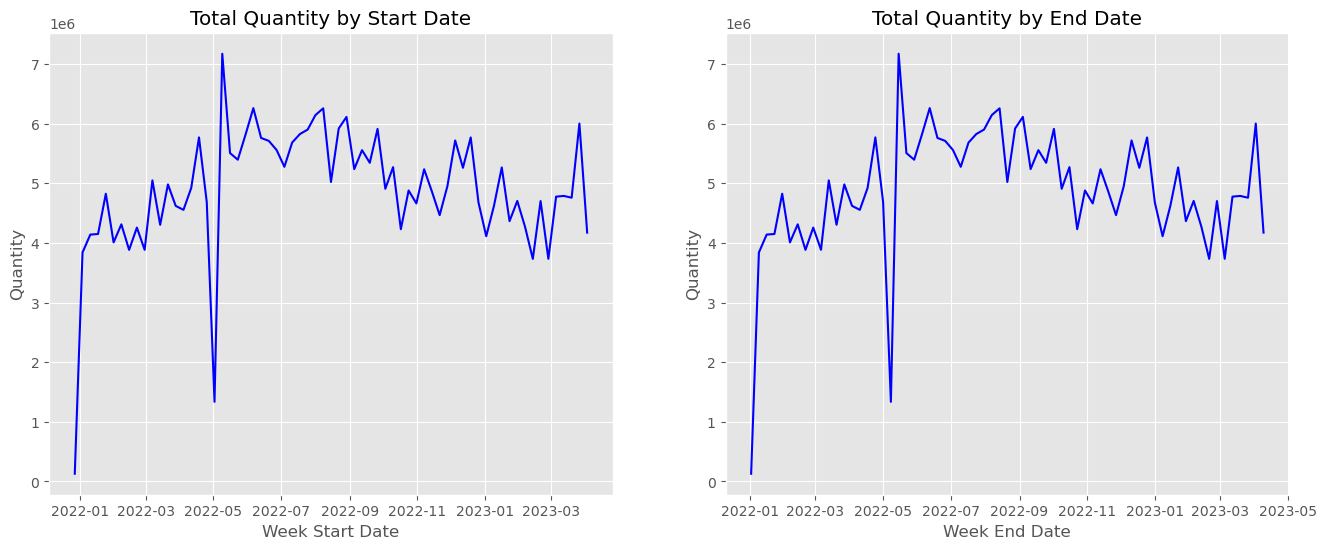

In [14]:
# Mengatur gaya plot
plt.style.use('ggplot')

# Mengelompokkan data berdasarkan week_start_date dan menghitung jumlah quantity
start_date = df.groupby('week_start_date')['quantity'].sum()

# Mengelompokkan data berdasarkan week_end_date dan menghitung jumlah quantity
end_date = df.groupby('week_end_date')['quantity'].sum()

# Membuat plot dengan sumbu X week_start_date dan sumbu Y quantity
fig, axes = plt.subplots(ncols=2, figsize=(16,6))
axes[0].plot(start_date.index, start_date.values,color='blue')
axes[0].set_title('Total Quantity by Start Date')
axes[0].set_xlabel('Week Start Date')
axes[0].set_ylabel('Quantity')

# Membuat plot dengan sumbu X week_end_date dan sumbu Y quantity
axes[1].plot(end_date.index, end_date.values,color='blue')
axes[1].set_title('Total Quantity by End Date')
axes[1].set_xlabel('Week End Date')
axes[1].set_ylabel('Quantity')

# Menampilkan plot
plt.show()


> Plot diatas merupakn perbandingan data quantity yang sudah dikelompokan berdasarkan week_start_data dan week_end_data.

> Dari line plot diatas, dapat diperhatikan bahwa tidak terdapat perbedaan pada data hanya perbedaan data tanggal saja.

    - Week_start_date= diambil dari tanggal di awal minggu
    - week_end_date = diambil dari tanggal di akhir minggu

> Pada project ini, akan fokus pada week_end_date karena pengambilan total dari penjualan perminggu diambil di akhir minggu bukan dari awal minggu. sehingga week_end_date yang akan digunakan pada pjoject ini

In [15]:
pd.DataFrame(df.groupby('product_item')['quantity'].sum().sort_values(ascending= False)).head(10)

,quantity
product_item,
2949ca4cfbf13969bccfbb9817f2526a,18206376
2db7ed9bd7573aec037aac59237cb3dd,9122007
160eb16a7369a645ec75caa3f14543d4,6771207
229a936943f7da9feea525f1a48d1d03,6658518
0f9d1e065ad64ecd7237084107a4bfbd,4202082
4275094eb25dd0a337a57f466008ec43,4096482
b194ef33e06abf24820fd38922554c16,3681026
6337f7f220187dcbfd7eb3baecd0e5b2,3571331
3db7dc00c35c94d2725cf69d625d7d8a,3546596


> Output diatas merupakan pengelompokan data per product dan diurutkan berdasarkan jumlah product terjual terbanyak

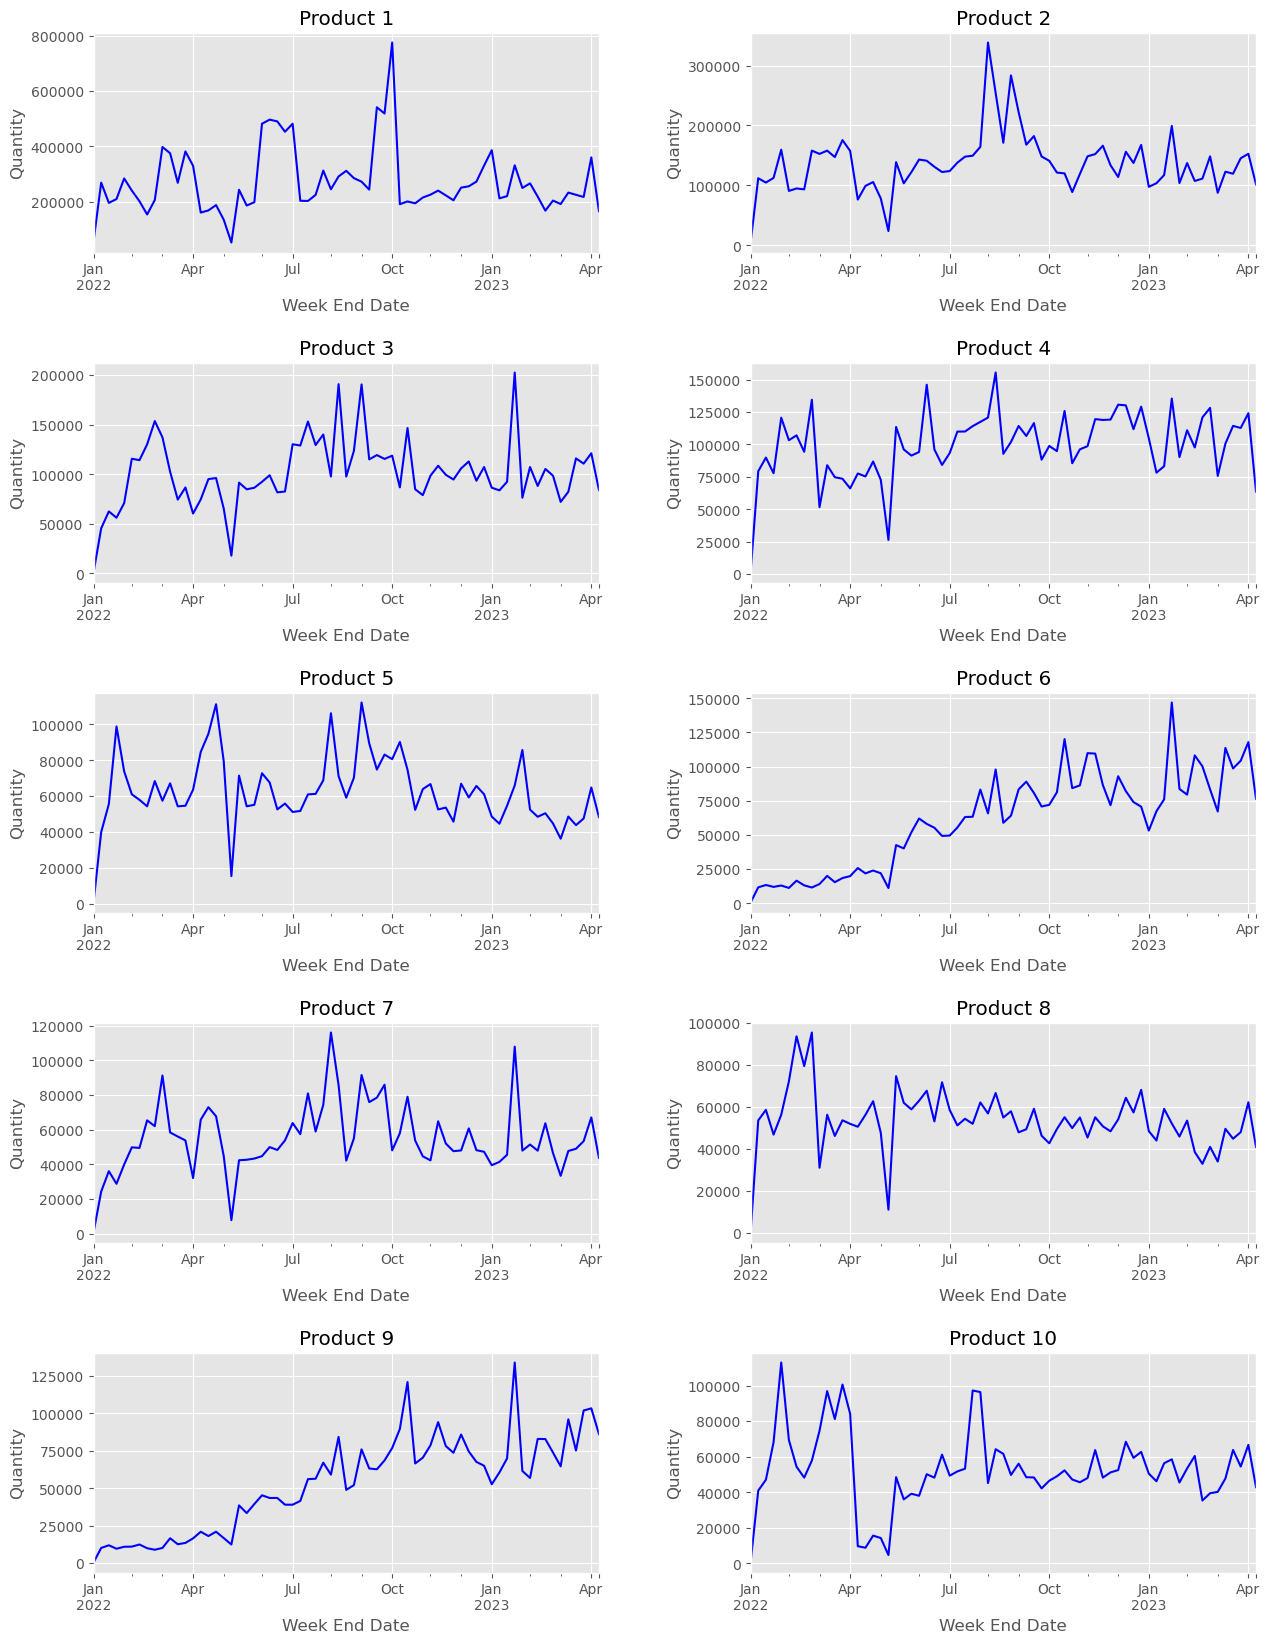

In [16]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
plt.subplots_adjust(wspace=0.3, hspace=0.5)

product_items = ['2949ca4cfbf13969bccfbb9817f2526a', '2db7ed9bd7573aec037aac59237cb3dd',
                '160eb16a7369a645ec75caa3f14543d4', '229a936943f7da9feea525f1a48d1d03',
                '0f9d1e065ad64ecd7237084107a4bfbd', '4275094eb25dd0a337a57f466008ec43',
                'b194ef33e06abf24820fd38922554c16', '6337f7f220187dcbfd7eb3baecd0e5b2',                  
                '3db7dc00c35c94d2725cf69d625d7d8a', 'ffbd6f1d884056a4f622d54ae79e5a14']

# Define a colormap
colors = plt.cm.rainbow(np.linspace(0, 1, len(product_items)))

for i, product_item in enumerate(product_items):
    row = i // 2
    col = i % 2
    product = df.loc[df['product_item'] == product_item]
    product.groupby('week_end_date')['quantity'].sum().plot(ax=axs[row, col], color='blue')
    axs[row, col].set_title(f"Product {i+1}")
    axs[row, col].set_xlabel('Week End Date')
    axs[row, col].set_ylabel('Quantity')

plt.show()


> Diatas merupakan line plot dari top 10 product yang terjual terbanyak.

> Dari plot diatas dapat dilihat bahwa sebagian besar product, penjualannya sangat fluktuatif dan hanya product peringkat 6 dan 9 yang terlihat cukup linear.

## Dataset top 5 Product

> Menurut saya jika hanya memprediksi quantity secara keseluruhan, data forecasting akan cukup sulit melihat data musiman dan dalam meramalkan data, data yang diramalkan akan cukup sulit meramalkan dengan tepat. Sehingga dalam project ini yang akan diforecasting tidak hanya quantity secara keseluruhan namun top 5 rpduct terbanyak juga akan di forecasting.

> Diambil hanya 5 data teratas karena keterbatasan waktu, sehingga data yang sempat diforecasting hanya:


    - All Product
    - Product 1(rank 1)
    - Product 2(rank 2)
    - Product 3(rank 3)
    - Product 4(rank 4)
    - Product 5(rank 5)

In [17]:
# All Product
all_product = df.groupby('week_end_date')['quantity'].sum()

#product1
product1= df.loc[df['product_item'] == '2949ca4cfbf13969bccfbb9817f2526a']
product1= product1.groupby('week_end_date')['quantity'].sum()

#product2
product2= df.loc[df['product_item'] == '2db7ed9bd7573aec037aac59237cb3dd']
product2= product2.groupby('week_end_date')['quantity'].sum()

#product3
product3= df.loc[df['product_item'] == '160eb16a7369a645ec75caa3f14543d4']
product3= product3.groupby('week_end_date')['quantity'].sum()

#product4
product4= df.loc[df['product_item'] == '229a936943f7da9feea525f1a48d1d03']
product4= product4.groupby('week_end_date')['quantity'].sum()

#product5
product5= df.loc[df['product_item'] == '0f9d1e065ad64ecd7237084107a4bfbd']
product5= product5.groupby('week_end_date')['quantity'].sum()

# 🔍 EDA Masing-Masing Pengelompokan

## EDA All Product

Pertama-tama, kita akan explore penjualan all product.

In [18]:
# Showing Quantity 
all_product

week_end_date
2022-01-02     128808
2022-01-09    3839557
2022-01-16    4138934
2022-01-23    4149077
2022-01-30    4824273
               ...   
2023-03-12    4775638
2023-03-19    4787111
2023-03-26    4757590
2023-04-02    6001166
2023-04-09    4172070
Name: quantity, Length: 67, dtype: int64

In [19]:
all_product.describe()

count    6.700000e+01
mean     4.893713e+06
std      1.044439e+06
min      1.288080e+05
25%      4.337716e+06
50%      4.907074e+06
75%      5.619344e+06
max      7.172144e+06
Name: quantity, dtype: float64

Di sini, kita dapat melihat statistik untuk data all_product. Kita dapat melihat bahwa data ini mencakup penjualan selama 67 minggu. Kita juga dapat melihat nilai minimum, maksimum, median, dan rata-rata dari data penjualan all_product kita. Rata-rata penjualan untuk produk ini adalah 4,893,713 dengan nilai minimum 128,808 dan maksimum 7,172,144, Selanjutnya, kita akan membuat plot data penjualan untuk all_product kita.

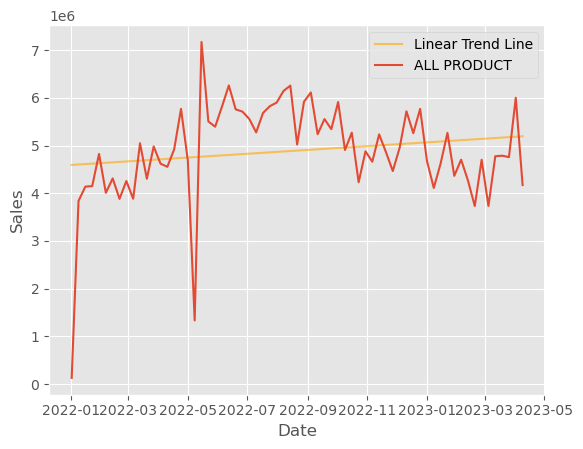

In [20]:
# add linear line
m, b = np.polyfit(range(len(all_product)), all_product, 1)
plt.plot(all_product.index, m*range(len(all_product)) + b, label='Linear Trend Line',color='orange', alpha=0.6)

# plot time series all_product
plt.plot(all_product.index, all_product, label='ALL PRODUCT')

# add labels and legend
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()

# show plot
plt.show()

Di sini, kita dapat melihat data penjualan all_product selama 67 minggu terakhir. Jika dilihat darigaris linearnya Trennya meningkat selama 67 minggu terakhir dengan pola yang sangat fluktuaktif. Karena dari plot ini tidak dapat terlihat jelas apakah data memiliki tren seperti apa dan seasonality setiap berapa periode sekali. sehingga perlu dilihat menggunakan decomposition.

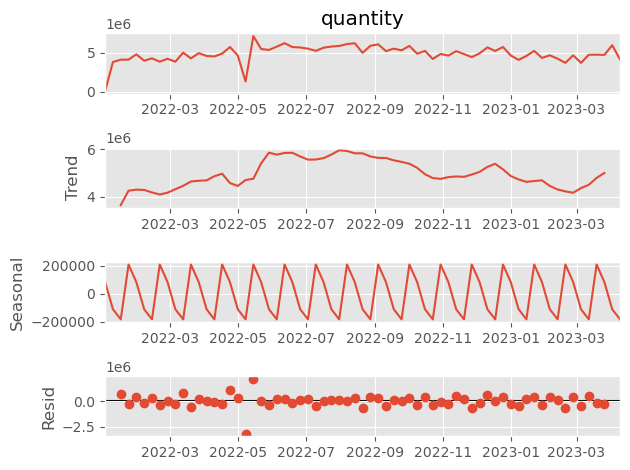

<Figure size 3000x600 with 0 Axes>

In [21]:
decomposition = seasonal_decompose(all_product, model="additive", period=4)
ax= decomposition.plot()

plt.figure(figsize=(30,6))
plt.show()

Diatas merupakan Decomposition dengan menggunakan model additive, karena dengan model ini residual pada data cukup kecil dan banyak yang mendekati. 

Kemudian untuk periode Seasonality yang ideal pada data ini adalah pada setiap 4 minggu. 

Untuk trend dari data ini cenderung naik turun, naik pada 2022 bulan ke 5 hingga 2022 bulan ke 8, dan kemudian turun

## EDA Product 1

Pertama-tama, kita akan explore penjualan product1.

In [22]:
# Showing Quantity 
product1

week_end_date
2022-01-02     56851
2022-01-09    269285
2022-01-16    196277
2022-01-23    210053
2022-01-30    284402
               ...  
2023-03-12    233312
2023-03-19    225327
2023-03-26    217546
2023-04-02    360227
2023-04-09    166022
Name: quantity, Length: 67, dtype: int64

In [23]:
product1.describe()

count        67.000000
mean     271736.955224
std      120704.950589
min       53186.000000
25%      202655.000000
50%      240542.000000
75%      312274.000000
max      774732.000000
Name: quantity, dtype: float64

Di sini, kita dapat melihat statistik untuk data product1. Kita dapat melihat bahwa data ini mencakup penjualan selama 67 minggu. Kita juga dapat melihat nilai minimum, maksimum, median, dan rata-rata dari data penjualan product1 kita. Rata-rata penjualan untuk produk ini adalah 271,736.95 dengan nilai minimum 53186 dan maksimum 774,732, Selanjutnya, kita akan membuat plot data penjualan untuk product1 kita.

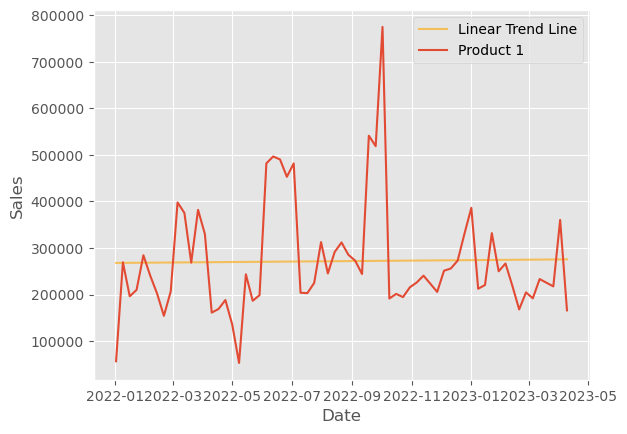

In [24]:
# add linear line
m, b = np.polyfit(range(len(product1)), product1, 1)
plt.plot(product1.index, m*range(len(product1)) + b, label='Linear Trend Line',color='orange', alpha=0.6)

# plot time series product1
plt.plot(product1.index, product1, label='Product 1')

# add labels and legend
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()

# show plot
plt.show()

Di sini, kita dapat melihat data penjualan product1 selama 67 minggu terakhir. Jika dilihat dari garis linearnya Trennya cenderung tetap stuck selama 67 minggu terakhir dengan pola yang sangat fluktuaktif. Karena dari plot ini tidak dapat terlihat jelas apakah data memiliki tren seperti apa dan seasonality setiap berapa periode sekali. sehingga perlu dilihat menggunakan decomposition.

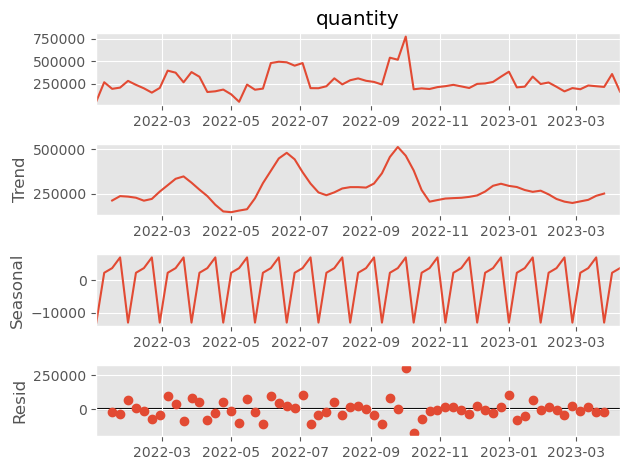

<Figure size 3000x600 with 0 Axes>

In [25]:
decomposition = seasonal_decompose(product1, model="additive", period=4)
ax= decomposition.plot()

plt.figure(figsize=(30,6))
plt.show()

Diatas merupakan Decomposition dengan menggunakan model additive, karena dengan model ini residual pada data cukup kecil dan banyak yang mendekati 0. 

Kemudian untuk periode Seasonality yang ideal pada data ini adalah pada setiap 4 minggu. 

Untuk trend dari data ini cenderung naik turun dari setiap bulan, yang mana dari decomposition diatas setiap 4 bulan sekali mengalami kenaikan dan kemudian turun kembali.

## EDA Product 2

Pertama-tama, kita akan explore penjualan product2.

In [26]:
# Showing Quantity 
product2

week_end_date
2022-01-02      4749
2022-01-09    111960
2022-01-16    104767
2022-01-23    112571
2022-01-30    159584
               ...  
2023-03-12    122889
2023-03-19    119540
2023-03-26    145335
2023-04-02    152781
2023-04-09    101608
Name: quantity, Length: 67, dtype: int64

In [27]:
product2.describe()

count        67.000000
mean     136149.358209
std       49548.075462
min        4749.000000
25%      106526.000000
50%      137278.000000
75%      154457.000000
max      338371.000000
Name: quantity, dtype: float64

Di sini, kita dapat melihat statistik untuk data product2. Kita dapat melihat bahwa data ini mencakup penjualan selama 67 minggu. Kita juga dapat melihat nilai minimum, maksimum, median, dan rata-rata dari data penjualan product2 kita. Rata-rata penjualan untuk produk ini adalah 136,149.35 dengan nilai minimum 53,186 dan maksimum 338,371, Selanjutnya, kita akan membuat plot data penjualan untuk product2 kita.

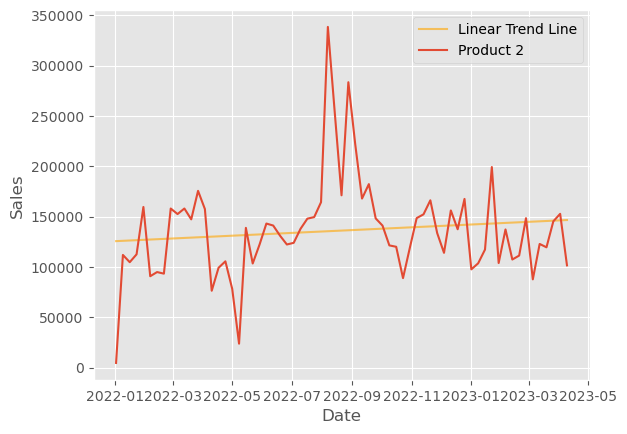

In [28]:
# add linear line
m, b = np.polyfit(range(len(product2)), product2, 1)
plt.plot(product2.index, m*range(len(product2)) + b, label='Linear Trend Line',color='orange', alpha=0.6)

# plot time series product2
plt.plot(product2.index, product2, label='Product 2')

# add labels and legend
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()

# show plot
plt.show()

Di sini, kita dapat melihat data penjualan product1 selama 67 minggu terakhir. Jika dilihat dari garis linearnya Trennya meningkat selama 67 minggu terakhir dengan pola yang sangat fluktuaktif. Karena dari plot ini tidak dapat terlihat jelas apakah data memiliki tren seperti apa dan seasonality setiap berapa periode sekali. sehingga perlu dilihat menggunakan decomposition.

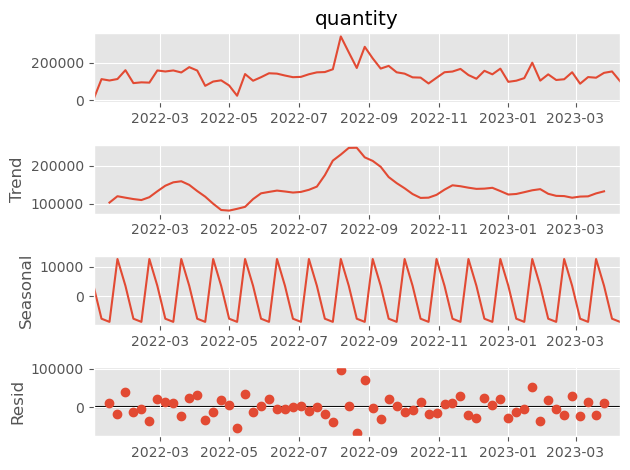

<Figure size 3000x600 with 0 Axes>

In [29]:
decomposition = seasonal_decompose(product2, model="additive", period=4)
ax= decomposition.plot()

plt.figure(figsize=(30,6))
plt.show()

Diatas merupakan Decomposition dengan menggunakan model additive, karena dengan model ini residual pada data cukup kecil dan banyak yang mendekati 0. 

Kemudian untuk periode Seasonality yang ideal pada data ini adalah pada setiap 4 minggu. 

Untuk trend dari data ini cenderung naik turun, namun memuncak pada bulan ke 8 pada tahun 2022

## EDA Product 3

Pertama-tama, kita akan explore penjualan product3.

In [30]:
# Showing Quantity 
product3

week_end_date
2022-01-02       866
2022-01-09     45415
2022-01-16     62469
2022-01-23     56122
2022-01-30     70807
               ...  
2023-03-12     82267
2023-03-19    115918
2023-03-26    110645
2023-04-02    121137
2023-04-09     84036
Name: quantity, Length: 67, dtype: int64

In [31]:
product3.describe()

count        67.000000
mean     101062.791045
std       34234.627755
min         866.000000
25%       83872.000000
50%       97654.000000
75%      115744.000000
max      202519.000000
Name: quantity, dtype: float64

Di sini, kita dapat melihat statistik untuk data product3. Kita dapat melihat bahwa data ini mencakup penjualan selama 67 minggu. Kita juga dapat melihat nilai minimum, maksimum, median, dan rata-rata dari data penjualan product3 kita. Rata-rata penjualan untuk produk ini adalah 101,062.79 dengan nilai minimum 866 dan maksimum 202,519, Selanjutnya, kita akan membuat plot data penjualan untuk product3 kita.

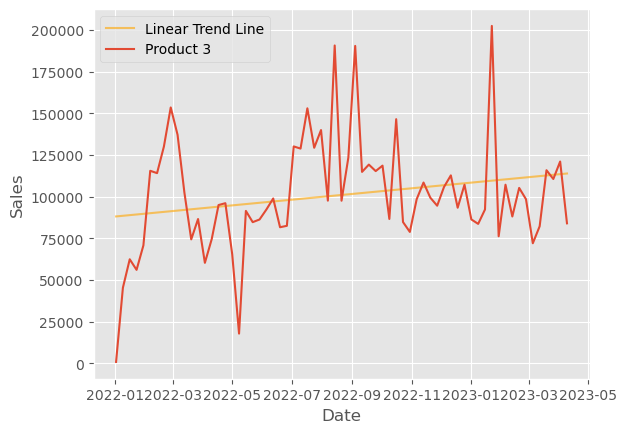

In [32]:
# add linear line
m, b = np.polyfit(range(len(product3)), product3, 1)
plt.plot(product3.index, m*range(len(product3)) + b, label='Linear Trend Line',color='orange', alpha=0.6)

# plot time series product3
plt.plot(product3.index, product3, label='Product 3')

# add labels and legend
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()

# show plot
plt.show()

Di sini, kita dapat melihat data penjualan product1 selama 67 minggu terakhir. Jika dilihat dari garis linearnya Trennya meningkat selama 67 minggu terakhir dengan pola yang sangat fluktuaktif. Karena dari plot ini tidak dapat terlihat jelas apakah data memiliki tren seperti apa dan seasonality setiap berapa periode sekali. sehingga perlu dilihat menggunakan decomposition.

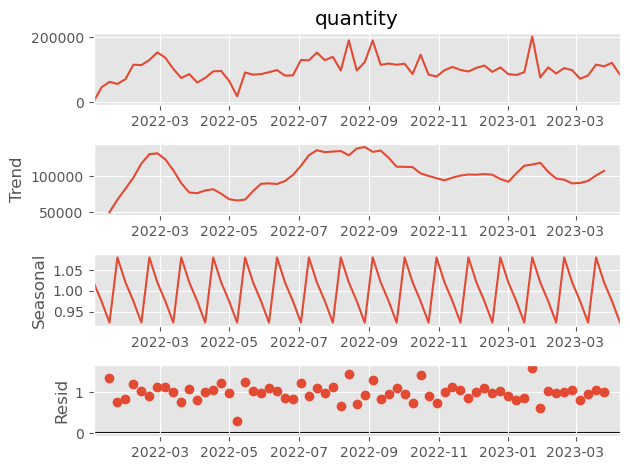

<Figure size 3000x600 with 0 Axes>

In [33]:
decomposition = seasonal_decompose(product3, model="multiplicative", period=4)
ax= decomposition.plot()

plt.figure(figsize=(30,6))
plt.show()

Diatas merupakan Decomposition dengan menggunakan model multiplicative, karena dengan model ini residual pada data cukup berhimpitan daripada model additive

Kemudian untuk periode Seasonality yang ideal pada data ini adalah pada setiap 4 minggu. 

Untuk trend dari data ini cenderung naik turun, namun memuncak pada bulan ke 3 pada tahun 2022 dan bulan ke 7-9 pada tahun 2022

## EDA Product 4

Pertama-tama, kita akan explore penjualan product4.

In [34]:
# Showing Quantity 
product4

week_end_date
2022-01-02      1168
2022-01-09     79302
2022-01-16     89870
2022-01-23     77781
2022-01-30    120669
               ...  
2023-03-12    100578
2023-03-19    114291
2023-03-26    112702
2023-04-02    124077
2023-04-09     63607
Name: quantity, Length: 67, dtype: int64

In [35]:
product4.describe()

count        67.000000
mean      99380.865672
std       25786.210407
min        1168.000000
25%       84831.500000
50%       98835.000000
75%      116934.000000
max      155479.000000
Name: quantity, dtype: float64

Di sini, kita dapat melihat statistik untuk data product4. Kita dapat melihat bahwa data ini mencakup penjualan selama 67 minggu. Kita juga dapat melihat nilai minimum, maksimum, median, dan rata-rata dari data penjualan product4 kita. Rata-rata penjualan untuk produk ini adalah 99,380.86 dengan nilai minimum 1,168 dan maksimum 155479, Selanjutnya, kita akan membuat plot data penjualan untuk product4 kita.

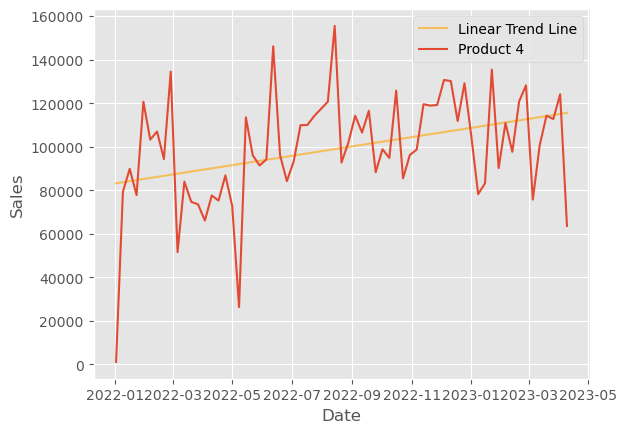

In [36]:
# add linear line
m, b = np.polyfit(range(len(product4)), product4, 1)
plt.plot(product4.index, m*range(len(product4)) + b, label='Linear Trend Line',color='orange', alpha=0.6)

# plot time series product4
plt.plot(product4.index, product4, label='Product 4')

# add labels and legend
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()

# show plot
plt.show()

Di sini, kita dapat melihat data penjualan product1 selama 67 minggu terakhir. Jika dilihat dari garis linearnya Trennya meningkat selama 67 minggu terakhir dengan pola yang sangat fluktuaktif. Karena dari plot ini tidak dapat terlihat jelas apakah data memiliki tren seperti apa dan seasonality setiap berapa periode sekali. sehingga perlu dilihat menggunakan decomposition.

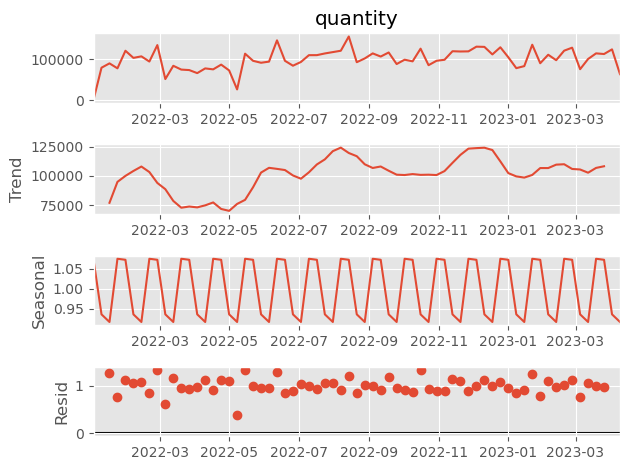

<Figure size 3000x600 with 0 Axes>

In [37]:
decomposition = seasonal_decompose(product4, model="multiplicative", period=4)
ax= decomposition.plot()

plt.figure(figsize=(30,6))
plt.show()

Diatas merupakan Decomposition dengan menggunakan model multiplicative, karena dengan model ini residual pada data cukup berhimpitan pada residual 1.

Kemudian untuk periode Seasonality yang ideal pada data ini adalah pada setiap 4 minggu. 

Untuk trend dari data ini cenderung naik turun, terjadi penurunan yang cukup signifikan pada bulan ke 4-5 pada tahun 2022 dan cenderung meningkat hingga bulan ke 4 tahun 2023

## EDA Product 5

Pertama-tama, kita akan explore penjualan product5.

In [38]:
# Showing Quantity 
product5

week_end_date
2022-01-02      718
2022-01-09    39937
2022-01-16    55591
2022-01-23    98804
2022-01-30    73824
              ...  
2023-03-12    48627
2023-03-19    43836
2023-03-26    47537
2023-04-02    64831
2023-04-09    48275
Name: quantity, Length: 67, dtype: int64

In [39]:
product5.describe()

count        67.000000
mean      62717.641791
std       19274.565944
min         718.000000
25%       52408.500000
50%       60970.000000
75%       71297.000000
max      112173.000000
Name: quantity, dtype: float64

Di sini, kita dapat melihat statistik untuk data product5. Kita dapat melihat bahwa data ini mencakup penjualan selama 67 minggu. Kita juga dapat melihat nilai minimum, maksimum, median, dan rata-rata dari data penjualan product5 kita. Rata-rata penjualan untuk produk ini adalah 62,717.64 dengan nilai minimum 718 dan maksimum 112,173, Selanjutnya, kita akan membuat plot data penjualan untuk product5 kita.

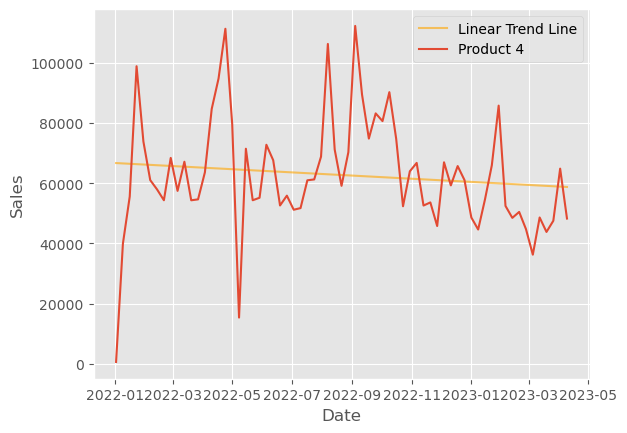

In [40]:
# add linear line
m, b = np.polyfit(range(len(product5)), product5, 1)
plt.plot(product5.index, m*range(len(product5)) + b, label='Linear Trend Line',color='orange', alpha=0.6)

# plot time series product5
plt.plot(product5.index, product5, label='Product 4')

# add labels and legend
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()

# show plot
plt.show()

Di sini, kita dapat melihat data penjualan product1 selama 67 minggu terakhir. Jika dilihat dari garis linearnya Trennya menurun selama 67 minggu terakhir dengan pola yang sangat fluktuaktif. Karena dari plot ini tidak dapat terlihat jelas apakah data memiliki tren seperti apa dan seasonality setiap berapa periode sekali. sehingga perlu dilihat menggunakan decomposition.

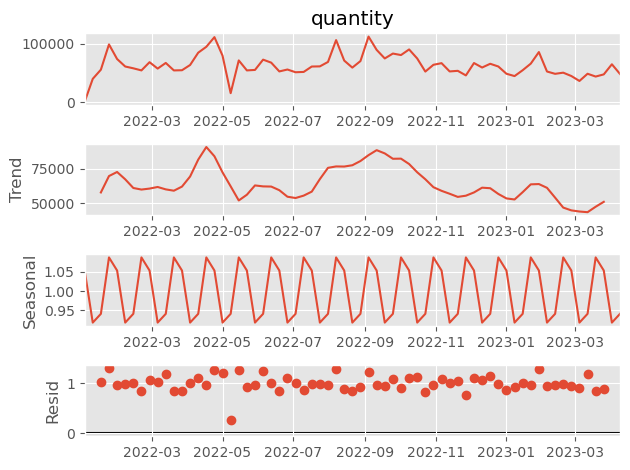

<Figure size 3000x600 with 0 Axes>

In [41]:
decomposition = seasonal_decompose(product5, model="multiplicative", period=4)
ax= decomposition.plot()

plt.figure(figsize=(30,6))
plt.show()

Diatas merupakan Decomposition dengan menggunakan model multiplicative, karena dengan model ini residual pada data cukup berhimpitan pada residual 1.

Kemudian untuk periode Seasonality yang ideal pada data ini adalah pada setiap 4 minggu. 

Untuk trend dari data ini cenderung naik turun, terjadi peningkatan pada bulan ke 4 tahun 2022 dan bulan ke 9-10 tahun 2022 dan kemudian mengalami penurunan sedikit demi sedikit hinnga bulan 4 tahun 2023

---
# ⚙️Preprocessing

---

## Stasionarity

`"Kestasioneran adalah konsep penting dalam analisis deret waktu, mengindikasikan bahwa properti statistik dari suatu data atau deret waktu tetap konstan seiring waktu, termasuk nilai rata-rata, variansi, dan autokorelasi. "`

sumber:  Introduction to Time Series Analysis in Python, oleh Jason Brownlee.

Dari kutipan tersebut menjelaskan bahwa stasioneritas atau kestasioneran merupakan konsep penting dalam analisis deret waktu, yang mengindikasikan bahwa properti statistik dari suatu data atau deret waktu tetap konstan seiring waktu. Properti statistik tersebut meliputi nilai rata-rata, variansi, dan korelasi, dan harus tetap konstan agar data atau deret waktu dapat diandalkan untuk digunakan dalam berbagai model dan teknik analisis deret waktu. Dalam analisis deret waktu, menjaga stasioneritas data atau deret waktu sangat penting untuk mendapatkan hasil yang akurat dan dapat diandalkan.

In [42]:
def check_stationarity(series):
    # Copied from https://machinelearningmastery.com/time-series-data-stationary-python/

    result = adfuller(series.values)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

### All Product

In [43]:
# Quantity
check_stationarity(all_product)

ADF Statistic: -3.328832
p-value: 0.013638
Critical Values:
	1%: -3.537
	5%: -2.908
	10%: -2.591
Stationary


Dari hasil diatas, dapat dilihat bahwa untuk data all_product merupakan data yang stationary pada tingkat level (tidak perlu dilakuakn differensial maupun log) karena nilai p-value yang lebih kecil dari 5% atau 0.05

### Product 1

In [44]:
# Product 1
check_stationarity(product1)

ADF Statistic: -5.027513
p-value: 0.000020
Critical Values:
	1%: -3.534
	5%: -2.906
	10%: -2.591
Stationary


Dari hasil diatas, dapat dilihat bahwa untuk data product1 merupakan data yang stationary pada tingkat level (tidak perlu dilakuakn differensial maupun log) karena nilai p-value yang lebih kecil dari 5% atau 0.05

### Product 2

In [45]:
# Product 2
check_stationarity(product2)

ADF Statistic: -2.637505
p-value: 0.085491
Critical Values:
	1%: -3.537
	5%: -2.908
	10%: -2.591
Non-stationary


Dari hasil diatas, dapat dilihat bahwa untuk data product2 merupakan data yang tidak stationary pada tingkat level (perlu dilakuakn differensial first degree) karena nilai p-value yang lebih besar dari 5% atau 0.05

In [46]:
# differencing product 2 sales data
product2_diff = product2.diff().fillna(0)

# Product 2
check_stationarity(product2_diff)


ADF Statistic: -9.139812
p-value: 0.000000
Critical Values:
	1%: -3.535
	5%: -2.907
	10%: -2.591
Stationary


Setelah dilakukan diff pada first degree data product2 menjadi data yang stationary pada tingkat first degree karena nilai p-value yang lebih besar dari 5% atau 0.05

### Product 3

In [47]:
# Product 3
check_stationarity(product3)

ADF Statistic: -4.264378
p-value: 0.000512
Critical Values:
	1%: -3.535
	5%: -2.907
	10%: -2.591
Stationary


Dari hasil diatas, dapat dilihat bahwa untuk data product3 merupakan data yang stationary pada tingkat level (tidak perlu dilakuakn differensial maupun log) karena nilai p-value yang lebih kecil dari 5% atau 0.05

### Product 4

In [48]:
# Product 4
check_stationarity(product4)

ADF Statistic: -2.853116
p-value: 0.051078
Critical Values:
	1%: -3.539
	5%: -2.909
	10%: -2.592
Non-stationary


Dari hasil diatas, dapat dilihat bahwa untuk data product4 merupakan data yang tidak stationary pada tingkat level (perlu dilakuakn differensial first degree) karena nilai p-value yang lebih besar dari 5% atau 0.05

In [49]:
# differencing product A1 sales data
product4_diff = product4.diff().fillna(0)

check_stationarity(product4_diff)


ADF Statistic: -7.667120
p-value: 0.000000
Critical Values:
	1%: -3.537
	5%: -2.908
	10%: -2.591
Stationary


Setelah dilakukan diff pada first degree data product4 menjadi data yang stationary pada tingkat first degree karena nilai p-value yang lebih besar dari 5% atau 0.05

### Product 5

In [50]:
# Product 5
check_stationarity(product5)

ADF Statistic: -5.752891
p-value: 0.000001
Critical Values:
	1%: -3.534
	5%: -2.906
	10%: -2.591
Stationary


Dari hasil diatas, dapat dilihat bahwa untuk data product5 merupakan data yang stationary pada tingkat level (tidak perlu dilakuakn differensial maupun log) karena nilai p-value yang lebih kecil dari 5% atau 0.05

## Autocorrelation

"ACF plot menunjukkan korelasi antara suatu deret waktu dan nilai-nilai tertundanya, sedangkan PACF plot menunjukkan korelasi antara suatu deret waktu dan nilai-nilai tertundanya dengan mengontrol pengaruh dari nilai pada lag lain."

Sumber:  "Time Series Analysis and Its Applications: With R Examples" oleh Robert H. Shumway & David S. Stoffer

ACF (Autocorrelation Function) dan PACF (Partial Autocorrelation Function) adalah alat yang digunakan dalam analisis deret waktu untuk memahami autokorelasi dari sebuah deret waktu. Autokorelasi merujuk pada korelasi suatu variabel dengan dirinya sendiri dari waktu ke waktu, yaitu korelasi antara suatu nilai dan versi tertundanya.

Plot ACF menunjukkan korelasi deret waktu dengan nilai-nilai tertundanya. Secara khusus, plot ini menunjukkan koefisien korelasi antara nilai deret waktu pada lag k dan nilai pada lag 0. Koefisien korelasi yang tinggi pada lag tertentu menunjukkan bahwa nilai-nilai pada lag tersebut berkaitan dengan nilai saat ini.

PACF plot, di sisi lain, menunjukkan korelasi antara deret waktu dan nilai-nilai tertundanya sambil mengontrol nilai-nilai pada lag lain. Dengan kata lain, plot ini menunjukkan koefisien korelasi antara nilai deret waktu pada lag k dan nilai pada lag 0, dengan efek dari lag 1 hingga k-1 dihapus.

Baik plot ACF maupun PACF dapat digunakan untuk mengidentifikasi urutan proses autoregresif (AR) dan moving average (MA), yang merupakan model umum yang digunakan dalam analisis deret waktu.

### All Product

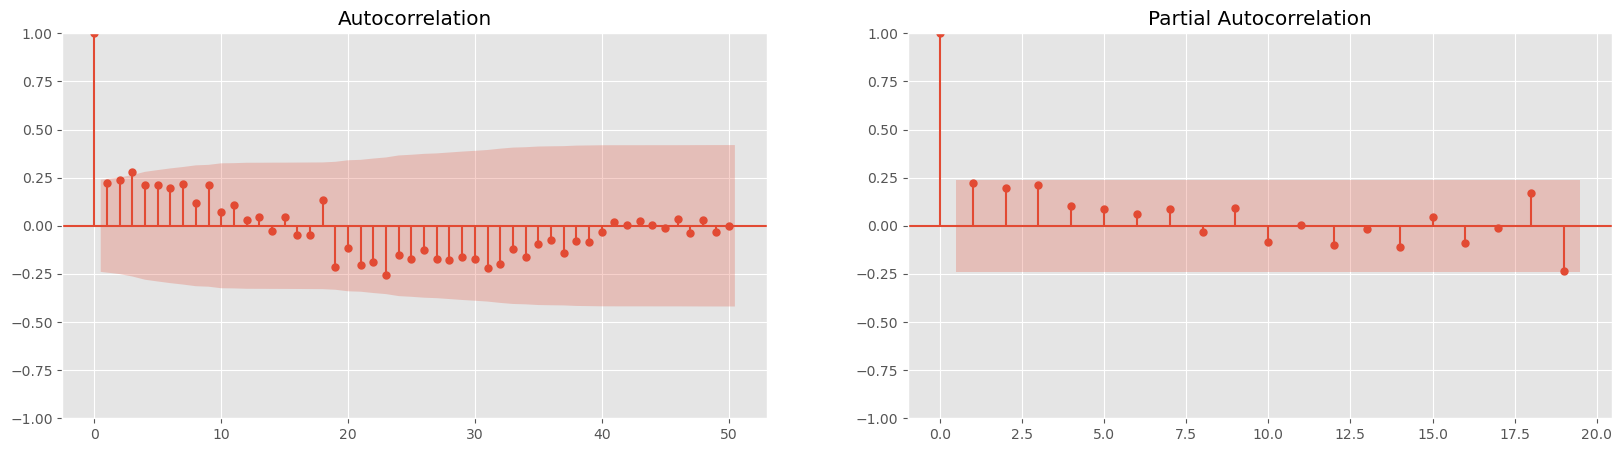

In [51]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
acf_plot = plot_acf(all_product, lags=50, ax=axs[0])
pacf_plot = plot_pacf(all_product, ax=axs[1], method='ywm')

Dalam kutipan tersebut, ACF plot menunjukkan bahwa moving average (MA) order yang dapat digunakan adalah 0,1,2 dan 3.

Sementara itu, PACF plot menunjukkan bahwa urutan autoregresif (AR) yang dapat digunakan adalah 0,1 dan 19. 

Dengan menggunakan informasi dari kedua plot, kita dapat memilih model ARIMA (AutoRegressive Integrated Moving Average) yang paling sesuai untuk memodelkan deret waktu tersebut, dengan mempertimbangkan order dari komponen autoregresif dan moving average yang sesuai.

### product1

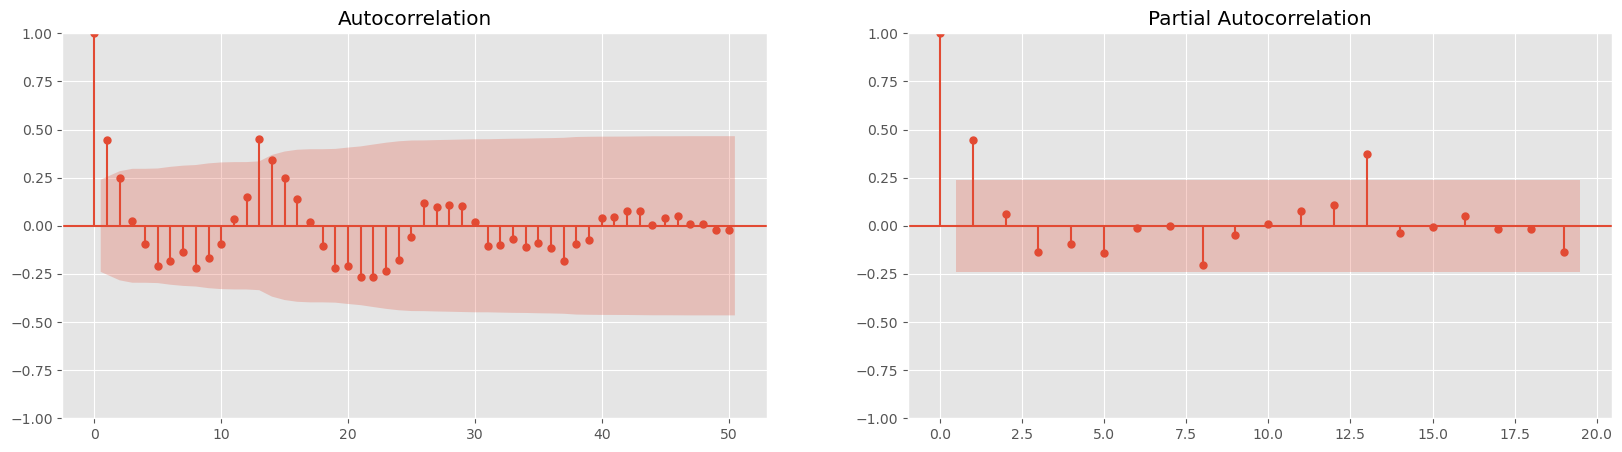

In [52]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
acf_plot = plot_acf(product1, lags=50, ax=axs[0])
pacf_plot = plot_pacf(product1, ax=axs[1], method='ywm')

Dalam kutipan tersebut, ACF plot menunjukkan bahwa moving average (MA) order yang dapat digunakan adalah 0,1 dan 13.

Sementara itu, PACF plot menunjukkan bahwa urutan autoregresif (AR) yang dapat digunakan adalah 0,1,8 dan 13. 

Dengan menggunakan informasi dari kedua plot, kita dapat memilih model ARIMA (AutoRegressive Integrated Moving Average) yang paling sesuai untuk memodelkan deret waktu tersebut, dengan mempertimbangkan order dari komponen autoregresif dan moving average yang sesuai.

### product2

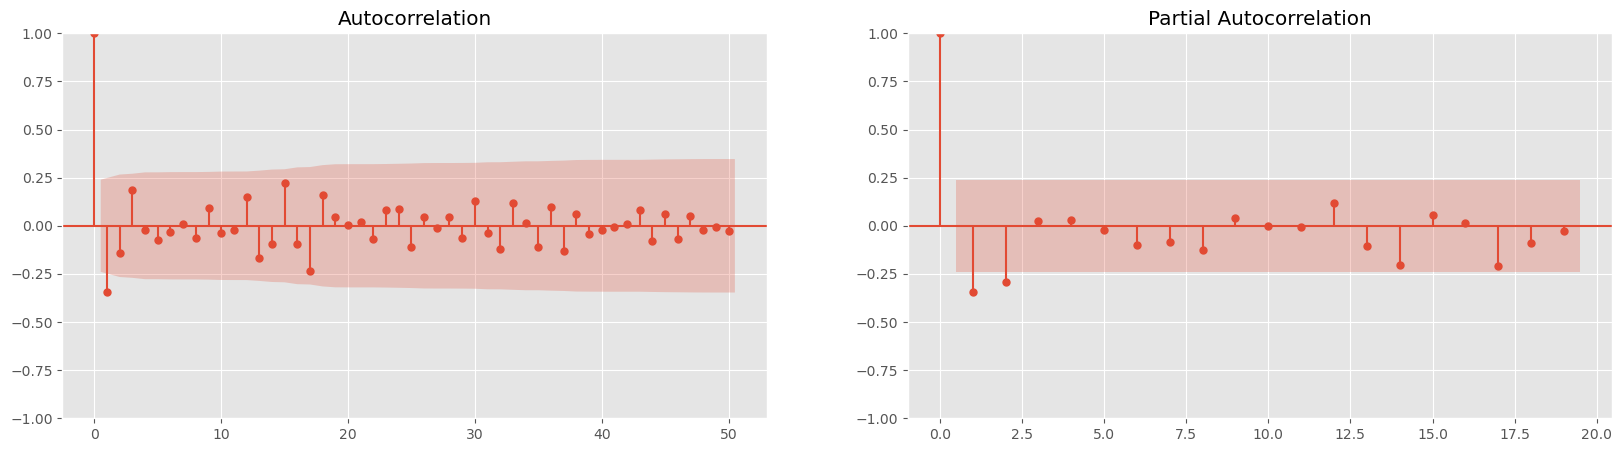

In [53]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
acf_plot = plot_acf(product2_diff, lags=50, ax=axs[0])
pacf_plot = plot_pacf(product2_diff, ax=axs[1], method='ywm')

Dalam kutipan tersebut, ACF plot menunjukkan bahwa moving average (MA) order yang dapat digunakan adalah 0 dan 1.

Sementara itu, PACF plot menunjukkan bahwa urutan autoregresif (AR) yang dapat digunakan adalah 0, 1, 2, 14 dan 16. 

Dengan menggunakan informasi dari kedua plot, kita dapat memilih model ARIMA (AutoRegressive Integrated Moving Average) yang paling sesuai untuk memodelkan deret waktu tersebut, dengan mempertimbangkan order dari komponen autoregresif dan moving average yang sesuai.

### product3

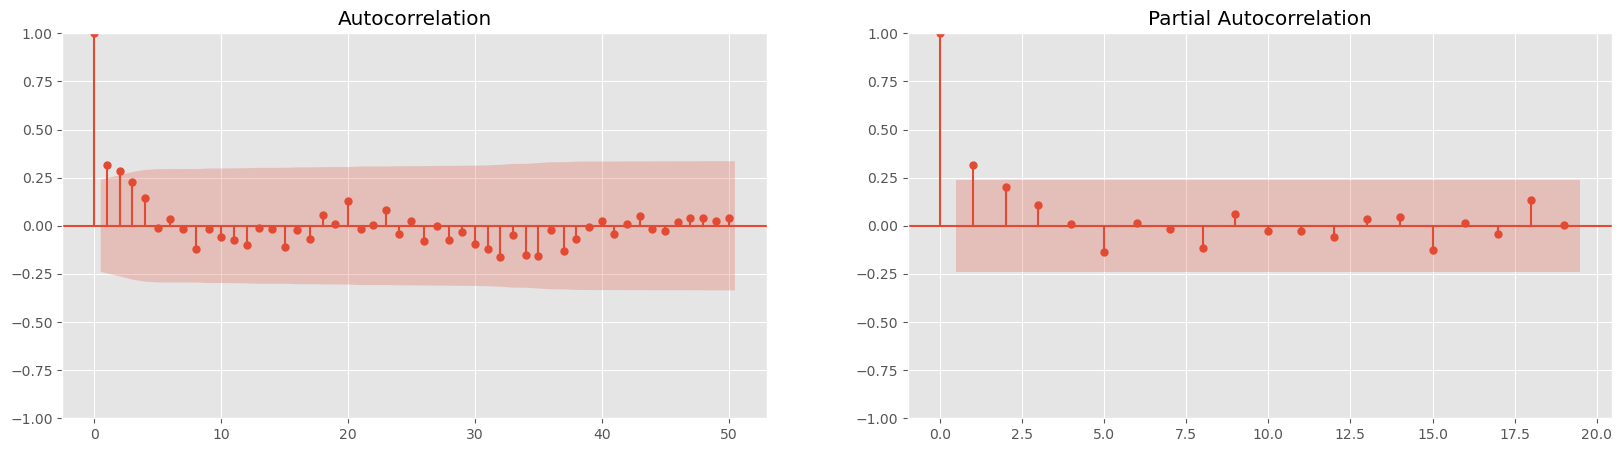

In [54]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
acf_plot = plot_acf(product3, lags=50, ax=axs[0])
pacf_plot = plot_pacf(product3, ax=axs[1], method='ywm')

Dalam kutipan tersebut, ACF plot menunjukkan bahwa moving average (MA) order yang dapat digunakan adalah 0, 1 dan 2.

Sementara itu, PACF plot menunjukkan bahwa urutan autoregresif (AR) yang dapat digunakan adalah 0 dan 1. 

Dengan menggunakan informasi dari kedua plot, kita dapat memilih model ARIMA (AutoRegressive Integrated Moving Average) yang paling sesuai untuk memodelkan deret waktu tersebut, dengan mempertimbangkan order dari komponen autoregresif dan moving average yang sesuai.

### product4

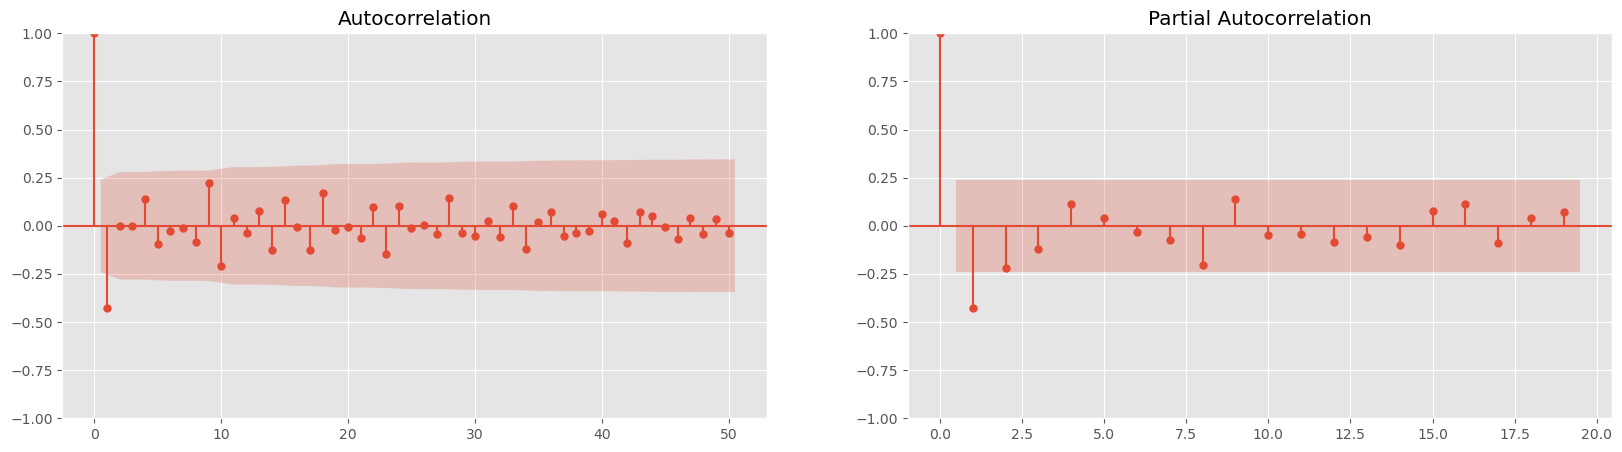

In [55]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
acf_plot = plot_acf(product4_diff, lags=50, ax=axs[0])
pacf_plot = plot_pacf(product4_diff, ax=axs[1], method='ywm')

Dalam kutipan tersebut, ACF plot menunjukkan bahwa moving average (MA) order yang dapat digunakan adalah 0, 1, 9 dan 10.

Sementara itu, PACF plot menunjukkan bahwa urutan autoregresif (AR) yang dapat digunakan adalah 0, 1, 2 dan 8. 

Dengan menggunakan informasi dari kedua plot, kita dapat memilih model ARIMA (AutoRegressive Integrated Moving Average) yang paling sesuai untuk memodelkan deret waktu tersebut, dengan mempertimbangkan order dari komponen autoregresif dan moving average yang sesuai.

### product5

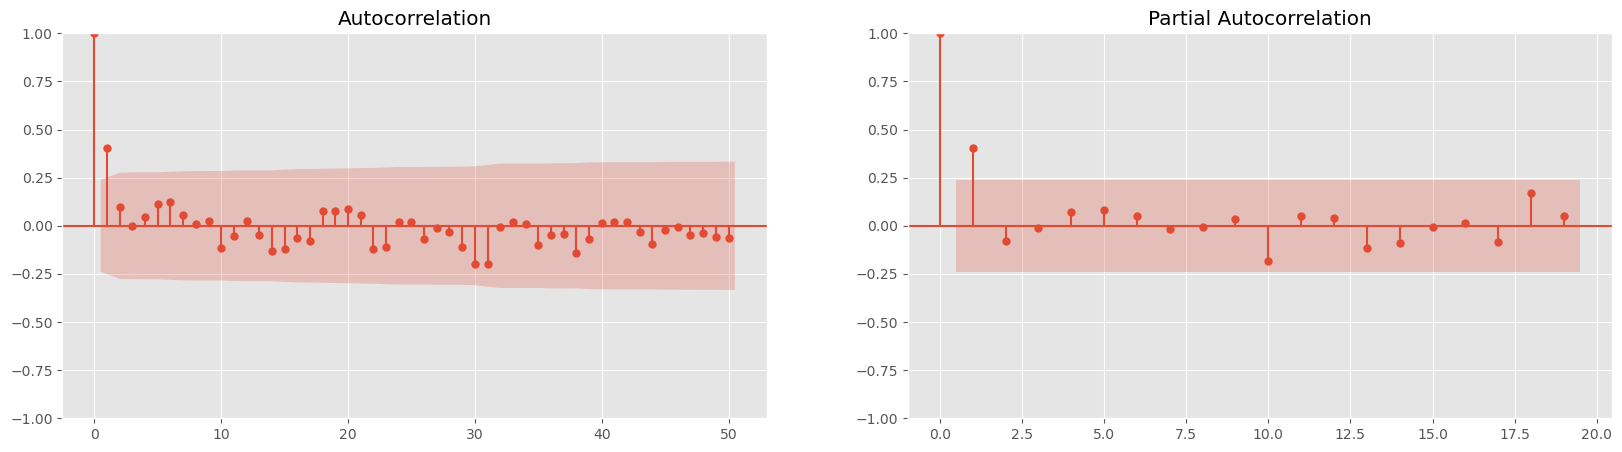

In [56]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
acf_plot = plot_acf(product5, lags=50, ax=axs[0])
pacf_plot = plot_pacf(product5, ax=axs[1], method='ywm')

Dalam kutipan tersebut, ACF plot menunjukkan bahwa moving average (MA) order yang dapat digunakan adalah 0 dan 1.

Sementara itu, PACF plot menunjukkan bahwa urutan autoregresif (AR) yang dapat digunakan adalah 0 dan 1.

Dengan menggunakan informasi dari kedua plot, kita dapat memilih model ARIMA (AutoRegressive Integrated Moving Average) yang paling sesuai untuk memodelkan deret waktu tersebut, dengan mempertimbangkan order dari komponen autoregresif dan moving average yang sesuai.

# Forecasting

Forecasting adalah sebuah metode atau teknik yang digunakan untuk memprediksi atau memperkirakan nilai atau kejadian di masa depan berdasarkan data historis dan tren yang ada. Dalam konteks bisnis, forecasting sering digunakan untuk meramalkan permintaan pasar, penjualan, dan produksi di masa depan, serta untuk membuat perencanaan dan keputusan bisnis yang strategis.

Metode forecasting biasanya melibatkan analisis dan interpretasi data historis yang terkait dengan variabel yang diprediksi, seperti penjualan, pengeluaran, atau pertumbuhan bisnis. Data tersebut kemudian diproses dan dianalisis menggunakan teknik statistik, seperti regresi linier, time series analysis, dan machine learning, untuk membuat model prediksi yang dapat digunakan untuk meramalkan nilai di masa depan.

Forecasting dapat membantu organisasi untuk merencanakan kegiatan bisnis, mengalokasikan sumber daya secara efektif, mengoptimalkan produksi, meningkatkan keuntungan, serta meminimalkan risiko bisnis. Dalam konteks ekonomi dan keuangan, forecasting juga dapat membantu investor dan analis untuk membuat keputusan investasi yang lebih bijaksana.

Dalam project ini digunakan 4 macam model yaitu:
- ARMA (tetap menggunakan model ARIMA namun d=0 pada order)
- ARIMA 
- SARIMAX
- Holt_Winter

ARMA, ARIMA, SARIMAX, dan Holt-Winters adalah model peramalan populer yang digunakan dalam analisis deret waktu.

- ARMA (Autoregressive Moving Average) adalah model statistik sederhana yang digunakan untuk memprediksi data berdasarkan nilai-nilai sebelumnya dan perbedaan antara nilai-nilai tersebut. Model ini didasarkan pada dua jenis komponen: model autoregresi (AR) dan model rata-rata bergerak (MA). Model ARMA digunakan untuk data yang tidak memiliki tren atau musiman.

- ARIMA (Autoregressive Integrated Moving Average) adalah pengembangan dari model ARMA dengan tambahan komponen integrasi. Komponen ini digunakan untuk memperbaiki data yang tidak stasioner. Model ARIMA dapat digunakan untuk memprediksi data yang memiliki tren dan/atau musiman.

- SARIMAX (Seasonal Autoregressive Integrated Moving Average with Exogenous Variables) adalah pengembangan dari model ARIMA dengan tambahan variabel eksogen. Variabel eksogen adalah variabel yang tidak terkait dengan seri waktu yang sedang diprediksi, tetapi dapat memengaruhi prediksi. Model SARIMAX digunakan untuk memprediksi data yang memiliki tren dan/atau musiman serta variabel eksogen.

- Holt-Winters adalah model eksponensial yang digunakan untuk memprediksi data yang memiliki tren dan/atau musiman. Model ini didasarkan pada tiga jenis komponen: level (komponen dasar), trend (komponen yang memperhitungkan perubahan dalam level), dan musiman (komponen yang memperhitungkan perubahan dalam periode waktu tertentu). Model Holt-Winters digunakan untuk memprediksi data yang memiliki tren dan/atau musiman.

Sumber:

Hyndman, R.J., & Athanasopoulos, G. (2018). Forecasting: principles and practice. OTexts: Melbourne, Australia.

Nau, R. (2021). Time series analysis for business forecasting. Duke University. Diakses dari https://people.duke.edu/~rnau/411home.htm.

In [57]:
def find_best_model(data,num_p,num_d,num_q):
    df=pd.DataFrame() #We make a pandas dataframe to ease our work, you can use any way that makes you comfortable and work easly
    pdq=[[],[],[]] #This list for storing the combinations of p and q
    aic=[] # This list for storing aic value
    for p in range(num_p+1): #plus one is to make the range up to num_p since python range only ranging from 0 to N-1
        for d in range(num_d+1):
            for q in range(num_q+1):
                if p!=0 and q!=0: #this logic will avoid (0,0) value which is not correct
                    try: #Using exception to avoid the error while training the model with certain p and q value
                        model=ARIMA(data,order=(p,d,q))
                        result=model.fit()
                        pdq[0].append(p)
                        pdq[1].append(d)
                        pdq[2].append(q)
                        aic.append(result.aic)
                    except:
                        pass #If there is an error caused by the calculation, it will be skipped to the next iteration
    df['p']=pdq[0]
    df['d']=pdq[1]
    df['q']=pdq[2]
    df['AIC']=aic
    
    df.sort_values('AIC',inplace=True)
    
    return df.p.iloc[0],df.d.iloc[0],df.q.iloc[0],df.AIC.iloc[0],df

Code diatas merupakan kode fuction auto ARIMA yang dapat digunkan untuk menentukan parameter terbaik (namun yang dilihat adalah nilai AIC terkecil) sehingga data ini terkadang hasil prediksi dari parameter ini tidak selalu baik dan memakan waktu yang cukup lama. sehingga dalam kasus ini tidak digunakan karena sudah dilakukan sebelumnya dan hasilnya tidak terlalu baik.

Sekarang, kita ingin membuat model peramalan untuk memprediksi penjualan semua produk 2 bulan ke depan. Pertama, kita membuat salinan data kita hanya untuk jaga-jaga dan kemudian akan direset indeksnya (dari 0-66, masih 67 hari dimulai dari 0). Kemudian, split "all_product" menjadi  train dan test, dengan data train adalah data tahun 2022 dan data test adalah tahun 2023. Variabel "frekuensi" diatur ke 4, menunjukkan bahwa data deret waktu memiliki frekuensi bulanan.

Setelah kita membuat model, kita menghitung kinerja model menggunakan kesalahan persentase absolut rata-rata (MAPE) dan kesalahan absolut rata-rata (MAE).

setalah itu, kita membuat plot data deret waktu asli dan nilai yang diprediksi. Data train ditunjukkan dalam warna merah, data test ditunjukan dengan warna biru dan prediksi ditunjukan dengan warna ungu. Sumbu x menunjukkan minggu dan sumbu y menunjukkan nilai penjualan.

- Diatas merupakan proses pengerjaan atau alur pengerjaan di setiap model. untuk parameter yang digunakan pada model diambil dari EDA yang sudah dilakukan diatas.

## All Product

In [58]:
# # Ignoring ARMA warnings
# import warnings
# warnings.filterwarnings('ignore')

# import pandas as pd
# from statsmodels.tsa.arima_model import ARMA


# data_all = start_date.copy()
# # Split the data_all into train and test sets
# train_all = data_all.iloc[:50]
# test_all = data_all.iloc[50:]

# p,d,q,AIC,df=find_best_model(train_all,20,0,20)

# print('The best model is that has p={}, d={} and q={} with AIC={}'.format(p,d,q,AIC))

Diatas merupakan salah satu pengaplikasian dari fuction auto ARIMA diatas

### ARMA

MAPE : 0.10793136965774645
MAE : 472303.3235393682


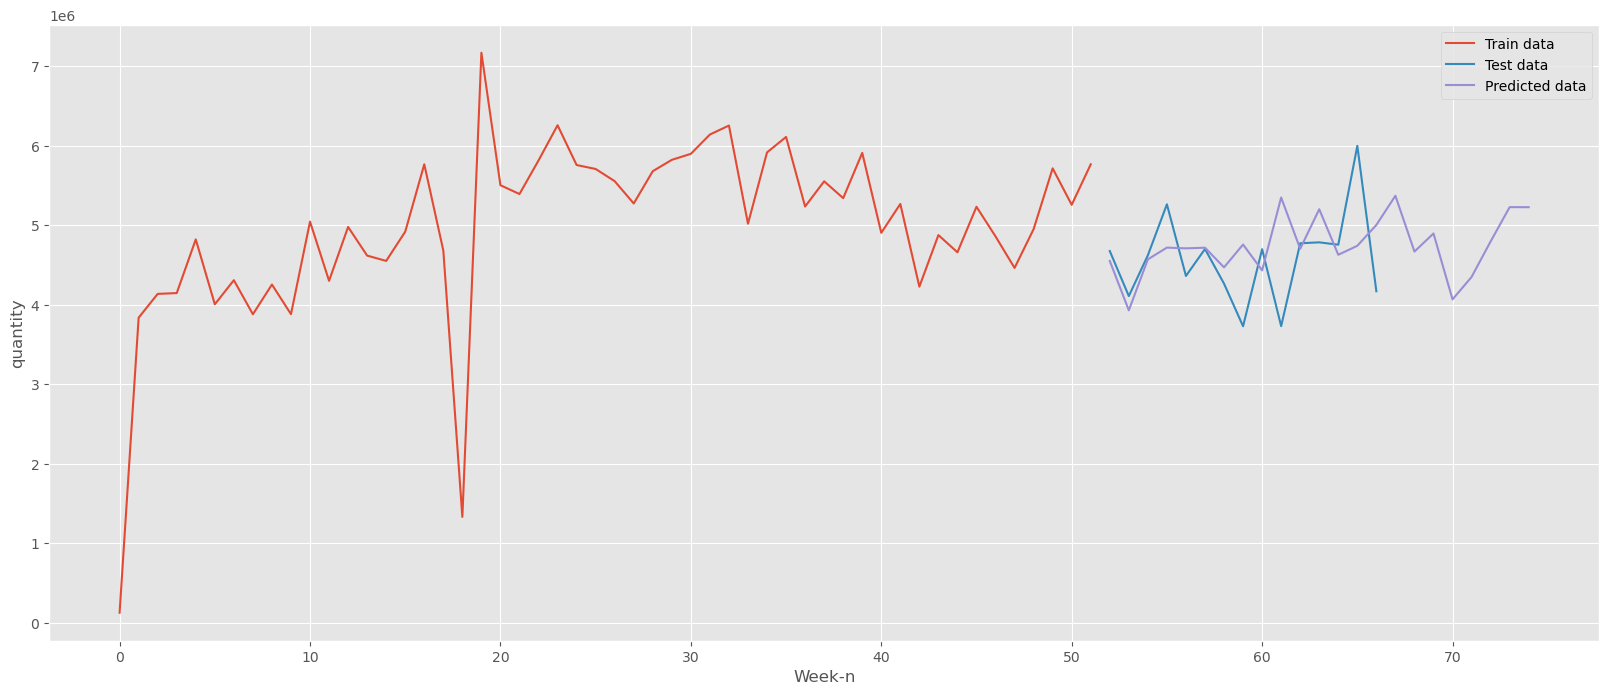

In [59]:
# Dalam kutipan tersebut, ACF plot menunjukkan bahwa moving average (MA) order yang dapat digunakan adalah 0,1,2 dan 3.
# Sementara itu, PACF plot menunjukkan bahwa urutan autoregresif (AR) yang dapat digunakan adalah 0,1 dan 19. 

# Copy data to data_all
data_all = all_product.copy()

# Set the index to a range of integers
data_all.index = range(len(data_all))

# Split the data_all into train and test sets (train is 2022 and test is 2023)
train_all = data_all.iloc[:52]
test_all = data_all.iloc[52:]

# Create and fit the ARIMA model
model_all = ARIMA(train_all, order=(19, 0, 3))
model_fit_all = model_all.fit()

# Generate predictions for the test set
predictions_all = model_fit_all.forecast(steps=len(test_all)+8)

# Evaluate the model performance (MAPE & MAE)
mape_all = mean_absolute_percentage_error(test_all, predictions_all[:15])
mae_all = mean_absolute_error(test_all, predictions_all[:15])
print(f'MAPE : {mape_all}')
print(f'MAE : {mae_all}')

# Plot the original data_all and the predicted values
plt.figure(figsize=(20,8))
plt.plot(train_all.index, train_all, label='Train data')
plt.plot(test_all.index, test_all, label='Test data')
plt.plot(predictions_all.index, predictions_all, label='Predicted data')
plt.legend()
plt.xlabel('Week-n')
plt.ylabel('quantity')
plt.show()

Diatas merupakan prediksi terbaik yang dapat diperoleh menggunakan model ARMA dengan MAPE sebesar 0.10% (Cukup Kecil). Hal ini cukup baik karena sudah dapat memprediksi pola data test dengan cukup baik walupun akurasinya yang masih belum baik. 

`Hasil ini sudah dilakukan menggunakan beberapa kombinasi dari nilai AR dan MA yang sudah ditemukan`

### SARIMAX

MAPE : 0.14821166832672666
MAE : 636834.5704173323


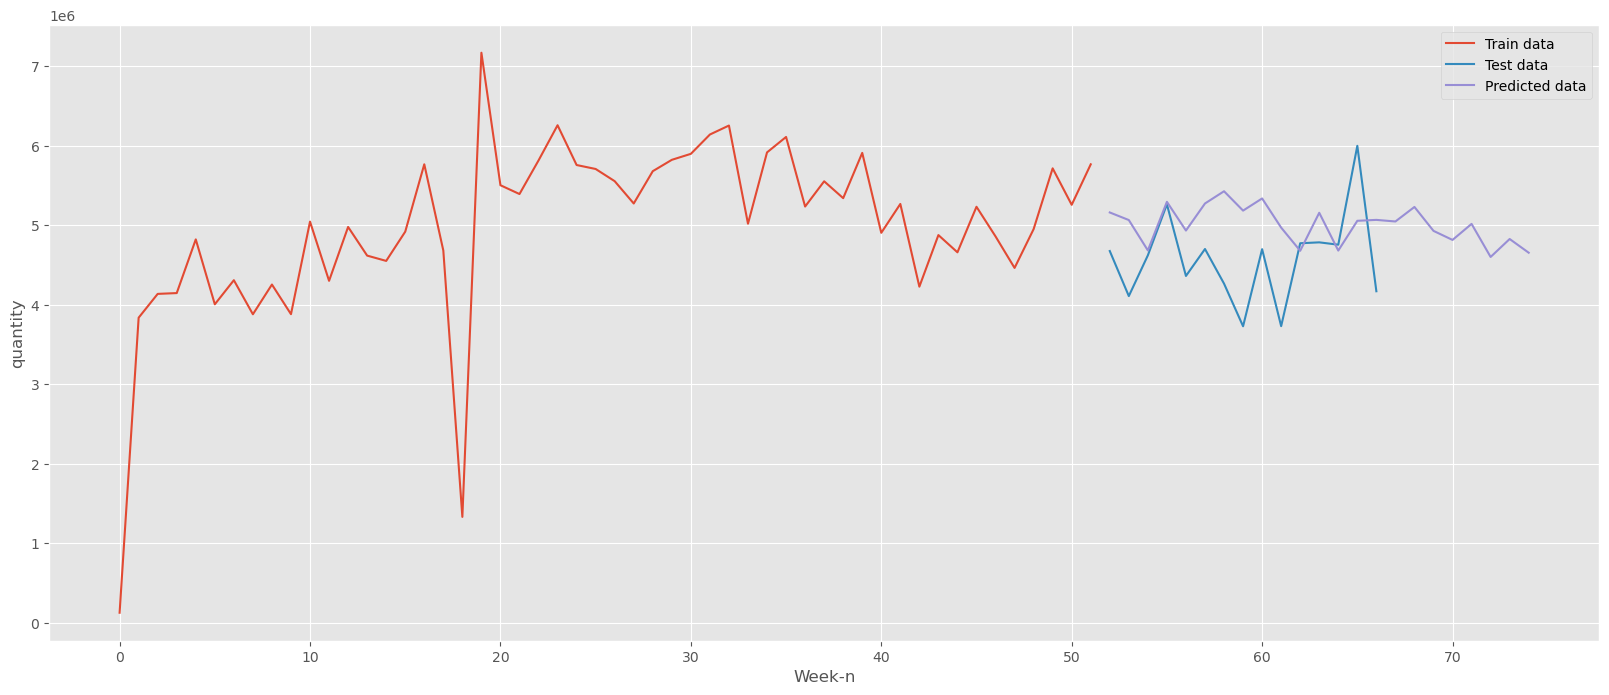

In [60]:
import warnings
warnings.filterwarnings('ignore')

# Load data_allS
data_allS = all_product.copy()

# Set the index to a range of integers
data_allS.index = range(len(data_allS))

# Set the frequency of the data_allS (assuming daily data_allS)
frequency_allS = 4

# Split the data_allS into train and test sets
train_allS = data_allS.iloc[:52]
test_allS = data_allS.iloc[52:]

# Create and fit the SARIMAX model
model_allS = SARIMAX(train_allS, order=(1, 0, 2), seasonal_order=(3, 0, 3, frequency_allS))
model_fit_allS = model_allS.fit(disp=False)

# Generate predictions for the test set
predictions_allS = model_fit_allS.forecast(steps=len(test_allS)+8)

# Evaluate the model performance (MAPE & MAE)
mape_allS = mean_absolute_percentage_error(test_allS, predictions_allS[:15])
mae_allS = mean_absolute_error(test_allS, predictions_allS[:15])
print(f'MAPE : {mape_allS}')
print(f'MAE : {mae_allS}')

# Plot the original data_allS and the predicted values
plt.figure(figsize=(20,8))
plt.plot(train_allS.index, train_allS, label='Train data')
plt.plot(test_allS.index, test_allS, label='Test data')
plt.plot(predictions_allS.index, predictions_allS, label='Predicted data')
plt.legend()
plt.xlabel('Week-n')
plt.ylabel('quantity')
plt.show()

Diatas merupakan prediksi terbaik yang dapat diperoleh menggunakan model SARIMAX dengan MAPE sebesar 0.14% (Cukup Kecil). Hal ini cukup baik karena sudah dapat memprediksi pola data test dengan cukup baik walupun akurasinya yang masih belum baik. Namun dengan model ARMA masih lebih baik model ARIMA diatas

`Hasil ini sudah dilakukan menggunakan beberapa kombinasi dari nilai AR dan MA yang sudah ditemukan, namun dengan seasonal order menggunakan AR dan MA maksimal saja`

### Holt_Winter

MAPE: 0.11244922499527252
MAE: 490576.6562448168


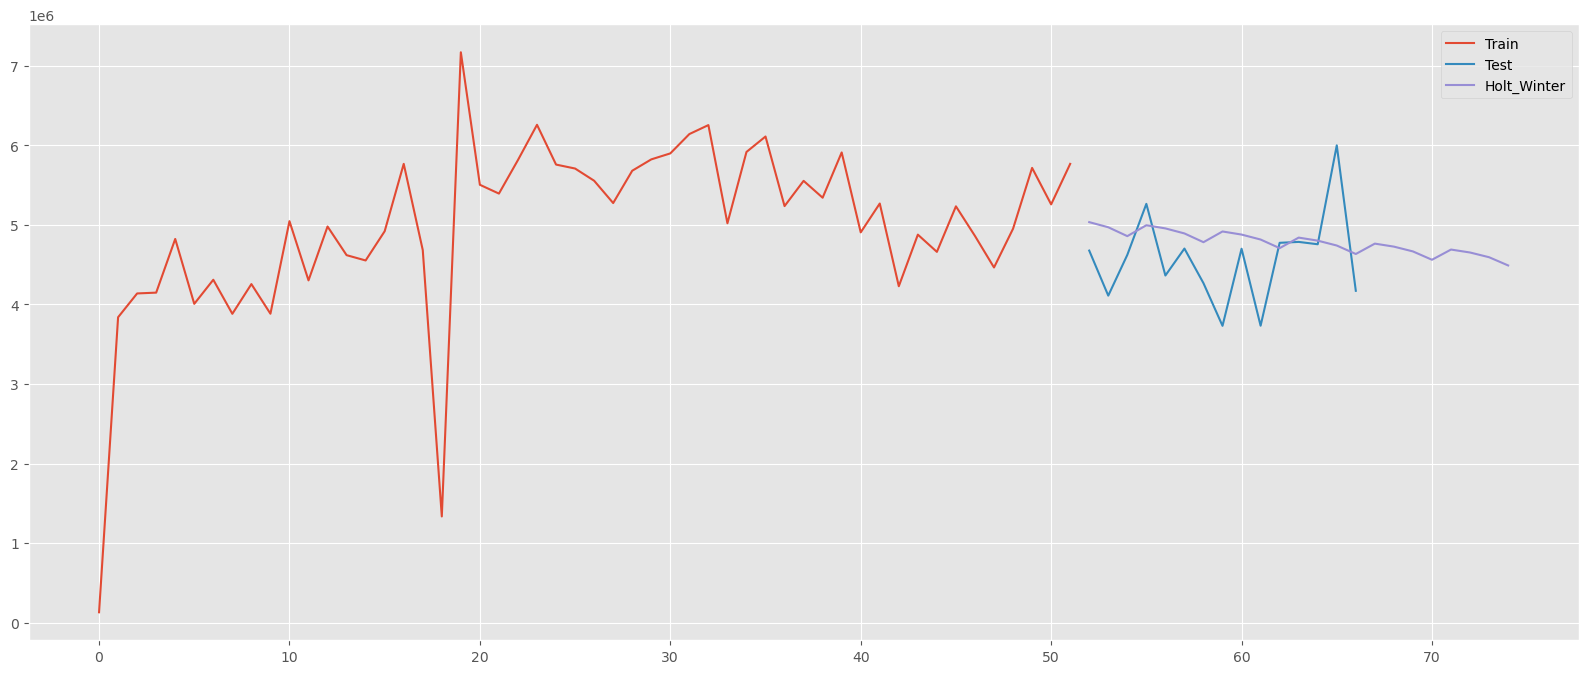

In [61]:
# Split the data_allS into train and test sets
train_allHW = data_allS.iloc[:52]
test_allHW = data_allS.iloc[52:]

y_hat_avg = test_allHW.copy()
fit1 = ExponentialSmoothing(np.asarray(train_allHW), seasonal_periods=4, trend='multiplicative', seasonal='multiplicative').fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test_allHW)+8)
Holt_Winter= pd.DataFrame(y_hat_avg['Holt_Winter'])
Holt_Winter.index=range(52, 75)

mape = mean_absolute_percentage_error(test_allHW, Holt_Winter[:15])
mae = mean_absolute_error(test_allHW, Holt_Winter[:15])
print("MAPE:", mape)
print("MAE:", mae)


plt.figure(figsize=(20,8))
plt.plot(train_allHW.index, train_allHW, label='Train')
plt.plot(test_allHW.index, test_allHW, label='Test')
plt.plot(Holt_Winter.index, Holt_Winter, label='Holt_Winter')
plt.legend(loc='best')
plt.show()


Diatas merupakan prediksi terbaik yang dapat diperoleh menggunakan model Holt_Winter dengan MAPE sebesar 0.11% (Cukup Kecil). Hal ini cukup baik karena sudah dapat memprediksi pola data test dengan cukup baik walupun akurasinya yang masih belum baik (plotnya belum bisa memrepresentasikan data test). Namun dengan model ARIMA masih lebih baik model ARIMA diatas

`Hasil ini sudah dilakukan menggunakan beberapa kombinasi dari model additive dan multiplicative`

### MODEL TERPILIH 

- Pada data ALL PRODUCT, model terpilih adalah model ARMA kareana nilai error yang kecil dan bentuk plot yang lebih tepat dibandingkan lainnya dalam memprediksi data test. Walaupun dalam plot prediksi untuk data test masih belum tepat namun sudah cukup dapat menjelaskan. 

- Tidak bisanya memprediksi data test dengan baik diasumsikan karena dari dataset ALL Product memiliki berbagai macam product didalamnya, yang diasumsikan bahwa product-product tersebut memiliki seasonality dan tren yang berbeda-beda. sehingga sulit untuk membuat prediksi yang tepat dalam data ini.

- Dari Model terpilih dapat dilihat bahwa, diperkirakan pada 3 minggu kedepan yaitu sekitar minggu ke 70 akan mengalami penurunan yang cukup signifikan walaupun akan kembali meningkat lagi seiring berjalannya waktu, namun hal tersebut perlu dilakukan tindakan agar pada realisasinya tidak mengalami penurunan, apalagi sampai sejauh itu.

## Product 1

### ARMA

MAPE : 0.21190303700187144
MAE : 52330.08156931517


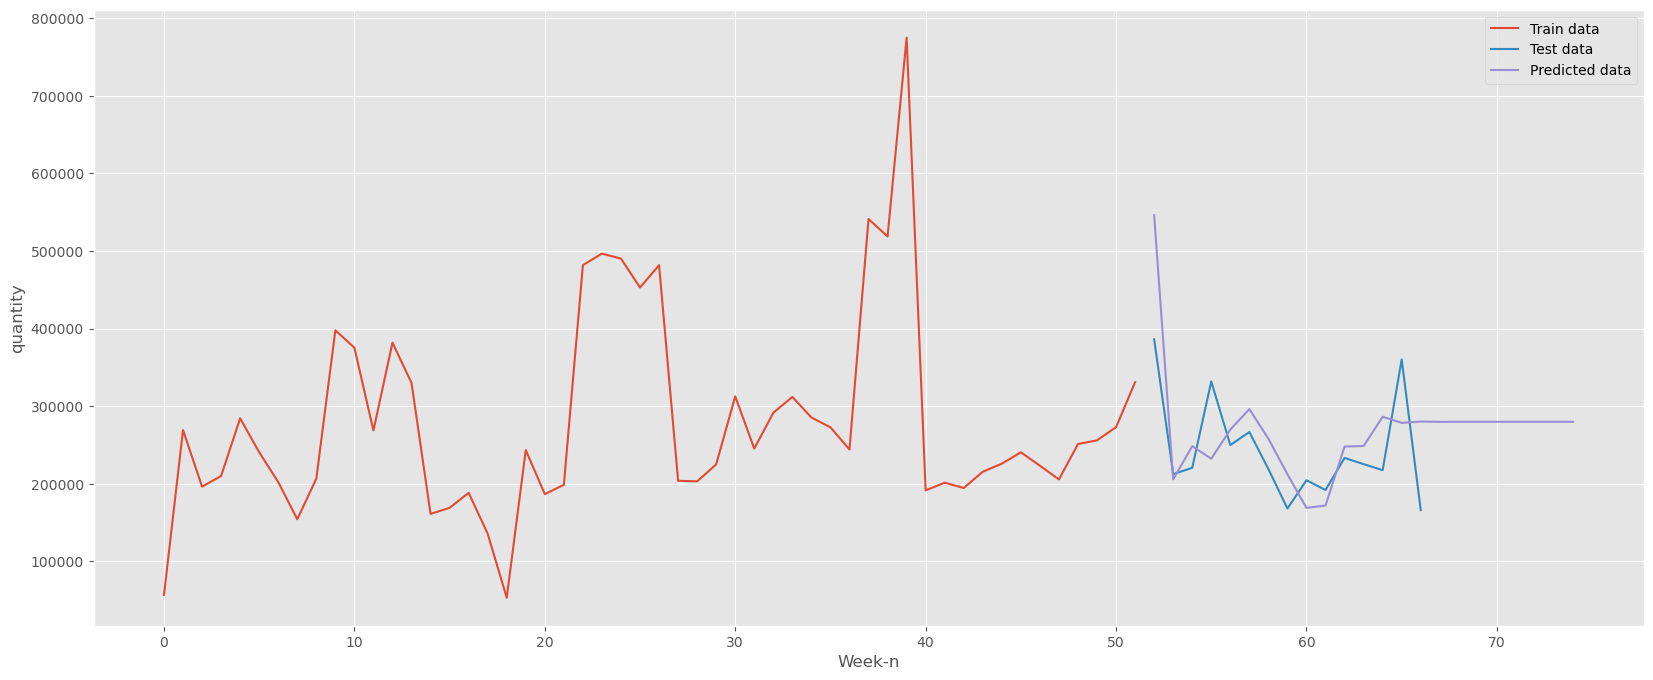

In [62]:
# Dalam kutipan tersebut, ACF plot menunjukkan bahwa moving average (MA) order yang dapat digunakan adalah 0,1 dan 13.
# Sementara itu, PACF plot menunjukkan bahwa urutan autoregresif (AR) yang dapat digunakan adalah 0,1,8 dan 13. 

# Copu data to data_product1
data_product1 = product1.copy()

# Set the index to a range of integers
data_product1.index = range(len(data_product1))

# Split the data_product1 into train and test sets
train_product1 = data_product1.iloc[:52]
test_product1 = data_product1.iloc[52:]

# Create and fit the SARIMAX model
model_product1 = ARIMA(train_product1, order=(1, 0, 12))
model_fit_product1 = model_product1.fit()

# Generate predictions for the test set
predictions_product1 = model_fit_product1.forecast(steps=len(test_product1)+8)

# Evaluate the model performance (MAPE & MAE)
mape_product1 = mean_absolute_percentage_error(test_product1,predictions_product1[:15])
mae_product1 = mean_absolute_error(test_product1,predictions_product1[:15])
print(f'MAPE : {mape_product1}')
print(f'MAE : {mae_product1}')

# Plot the original data_product1 and the predicted values
plt.figure(figsize=(20,8))
plt.plot(train_product1.index, train_product1, label='Train data')
plt.plot(test_product1.index, test_product1, label='Test data')
plt.plot(predictions_product1.index, predictions_product1, label='Predicted data')
plt.legend()
plt.xlabel('Week-n')
plt.ylabel('quantity')
plt.show()

Diatas merupakan prediksi terbaik yang dapat diperoleh menggunakan model ARMA dengan MAPE sebesar 0.21% (Cukup Kecil). Hal ini cukup baik karena sudah dapat memprediksi pola data test dengan cukup baik walupun akurasinya yang masih belum baik. walaupun masih ada sedikit miss pada beberapa prediksi test, namun dalam plot ini dapat merepresentasikan data test dengan cukup baik untuk peningkatan dan penurunannya. hal ini baik adanya karena dari model ini dapat memberikan kontibusi dan membuat keputusan yang tepat dari model ini. (namun cukup meragukan pada prediksi data seletelah periode test) 

`Hasil ini sudah dilakukan menggunakan beberapa kombinasi dari nilai AR dan MA yang sudah ditemukan`

### SARIMAX

MAPE : 0.17953497214204736
MAE : 44849.39811898143


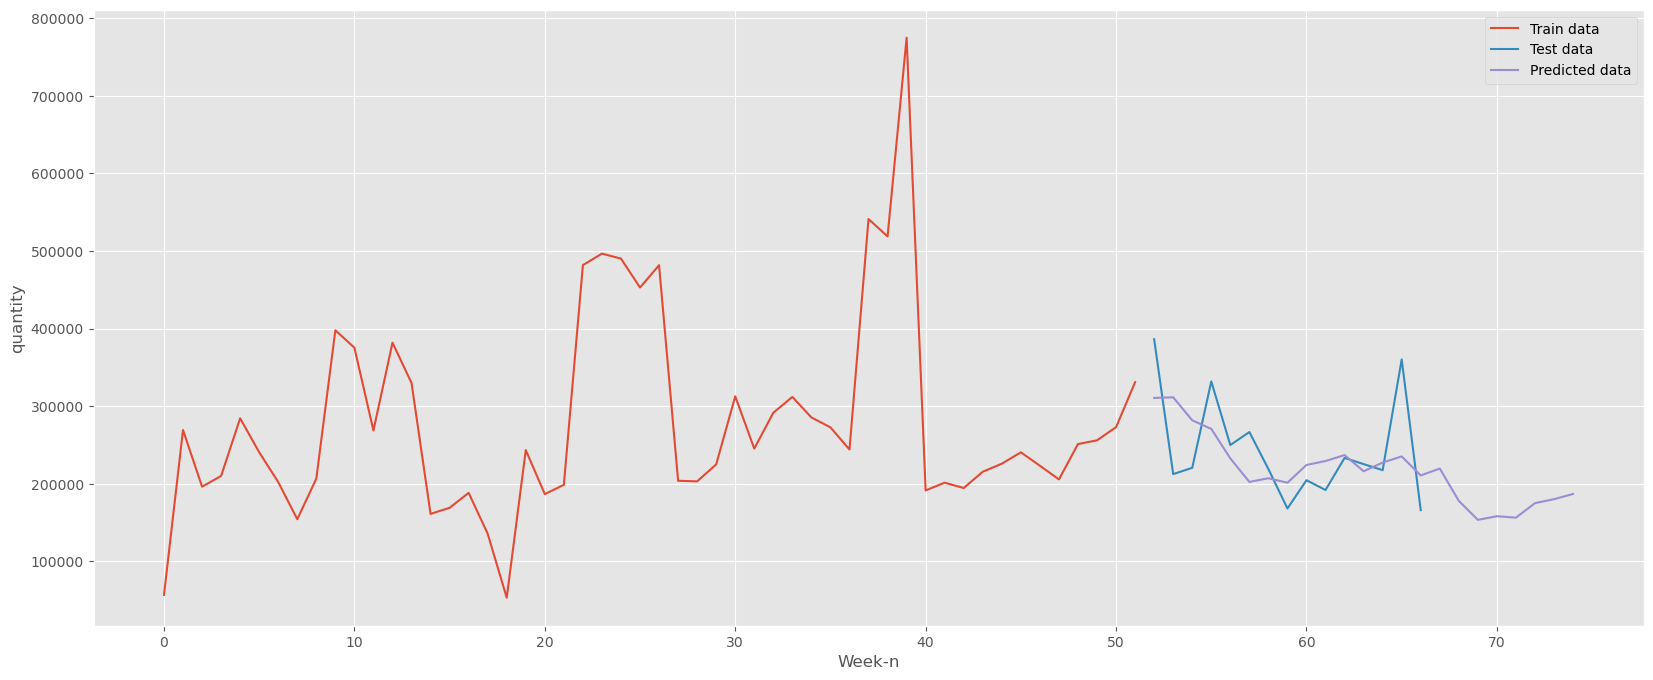

In [63]:
import warnings
warnings.filterwarnings('ignore')

# Load data_product1S
data_product1S = product1.copy()

# Set the index to a range of integers
data_product1S.index = range(len(data_product1S))

# Set the frequency of the data_product1S (assuming daily data_product1S)
frequency_product1S = 4

# Split the data_product1S into train and test sets
train_product1S = data_product1S.iloc[:52]
test_product1S = data_product1S.iloc[52:]

# Create and fit the SARIMAX model
model_product1S = SARIMAX(train_product1S, order=(1, 0, 1), seasonal_order=(3, 0, 3, frequency_product1S))
model_fit_product1S = model_product1S.fit(disp=False)

# Generate predictions for the test set
predictions_product1S = model_fit_product1S.forecast(steps=len(test_product1S)+8)

# Evaluate the model performance (MAPE & MAE)
mape_product1S = mean_absolute_percentage_error(test_product1S, predictions_product1S[:15])
mae_product1S = mean_absolute_error(test_product1S, predictions_product1S[:15])
print(f'MAPE : {mape_product1S}')
print(f'MAE : {mae_product1S}')

# Plot the original data_product1S and the predicted values
plt.figure(figsize=(20,8))
plt.plot(train_product1S.index, train_product1S, label='Train data')
plt.plot(test_product1S.index, test_product1S, label='Test data')
plt.plot(predictions_product1S.index, predictions_product1S, label='Predicted data')
plt.legend()
plt.xlabel('Week-n')
plt.ylabel('quantity')
plt.show()


Diatas merupakan prediksi terbaik yang dapat diperoleh menggunakan model SARIMAX dengan MAPE sebesar 0.17% (Cukup Kecil). Hal ini cukup baik karena sudah dapat memprediksi pola data test dengan cukup baik walupun akurasinya yang masih belum baik. walaupun masih ada sedikit miss pada beberapa prediksi test, namun dalam plot ini dapat merepresentasikan data test dengan cukup baik untuk peningkatan dan penurunannya. hal ini baik adanya karena dari model ini dapat memberikan kontibusi dan membuat keputusan yang tepat dari model ini. (Cukup baik dari pada ARMA dalam menjelaskan data setelah periode test) 

`Hasil ini sudah dilakukan menggunakan beberapa kombinasi dari nilai AR dan MA yang sudah ditemukan, namun dengan seasonal order menggunakan AR dan MA maksimal saja`

### Holt_Winter

MAPE: 0.8913775485299991
MAE: 190417.75050003864


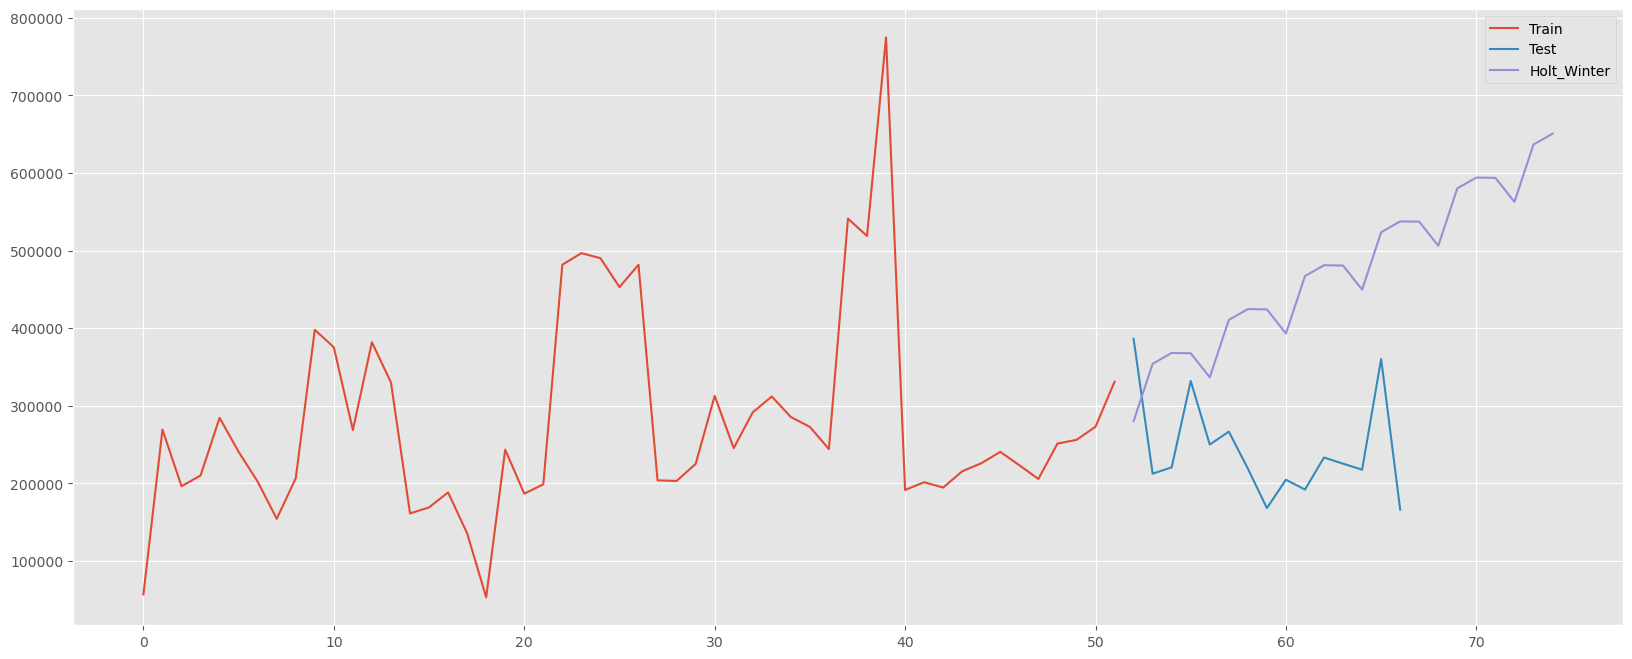

In [64]:
# Split the data_product1S into train and test sets
train_product1HW = data_product1S.iloc[:52]
test_product1HW = data_product1S.iloc[52:]

y_hat_avg = test_product1HW.copy()
fit1 = ExponentialSmoothing(np.asarray(train_product1HW), seasonal_periods=4, trend='additive', seasonal='additive').fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test_product1HW)+8)
Holt_Winter= pd.DataFrame(y_hat_avg['Holt_Winter'])
Holt_Winter.index=range(52, 75)

mape = mean_absolute_percentage_error(test_product1HW, Holt_Winter[:15])
mae = mean_absolute_error(test_product1HW, Holt_Winter[:15])
print("MAPE:", mape)
print("MAE:", mae)


plt.figure(figsize=(20,8))
plt.plot(train_product1HW.index, train_product1HW, label='Train')
plt.plot(test_product1HW.index, test_product1HW, label='Test')
plt.plot(Holt_Winter.index, Holt_Winter, label='Holt_Winter')
plt.legend(loc='best')
plt.show()

Diatas merupakan prediksi terbaik yang dapat diperoleh menggunakan model Holt_Winter dengan MAPE sebesar 0.89% (Cukup besar). Hal ini tidak cukup baik karena prediksi pola data test dengan cukup jauh (plotnya belum bisa memrepresentasikan data test).

`Hasil ini sudah dilakukan menggunakan beberapa kombinasi dari model additive dan multiplicative`

### MODEL TERPILIH 

- Pada data Product1, model terpilih adalah model SARIMAX kareana nilai error yang kecil dan bentuk plot yang lebih tepat dibandingkan lainnya dalam memprediksi data test. Walaupun dalam plot prediksi untuk data test masih belum tepat namun sudah cukup dapat menjelaskan.

- Dari Model terpilih dapat dilihat bahwa, diperkirakan pada 2 minggu kedepan yaitu sekitar minggu ke 69 akan mengalami penurunan, namun jika diperhatikan dari data test yang pada minggu terakhir jumlah penjualan sedang turun namun akan mulai membaik pada minggu ke 70 walaupun peningkatannya tidak terlalu banyak. Oleh sebab itu dari hasil ini diharapkan dapat membantu penjualan dan memberikan kebijakan yang lebih tepat agar peningkatannya bisa dipercepat dan peningkatannya bisa lebih tinggi dari prediksi yang tertera.

## Product 2

### ARIMA

MAPE : 0.433063497729896
MAE : 46234.28958309206


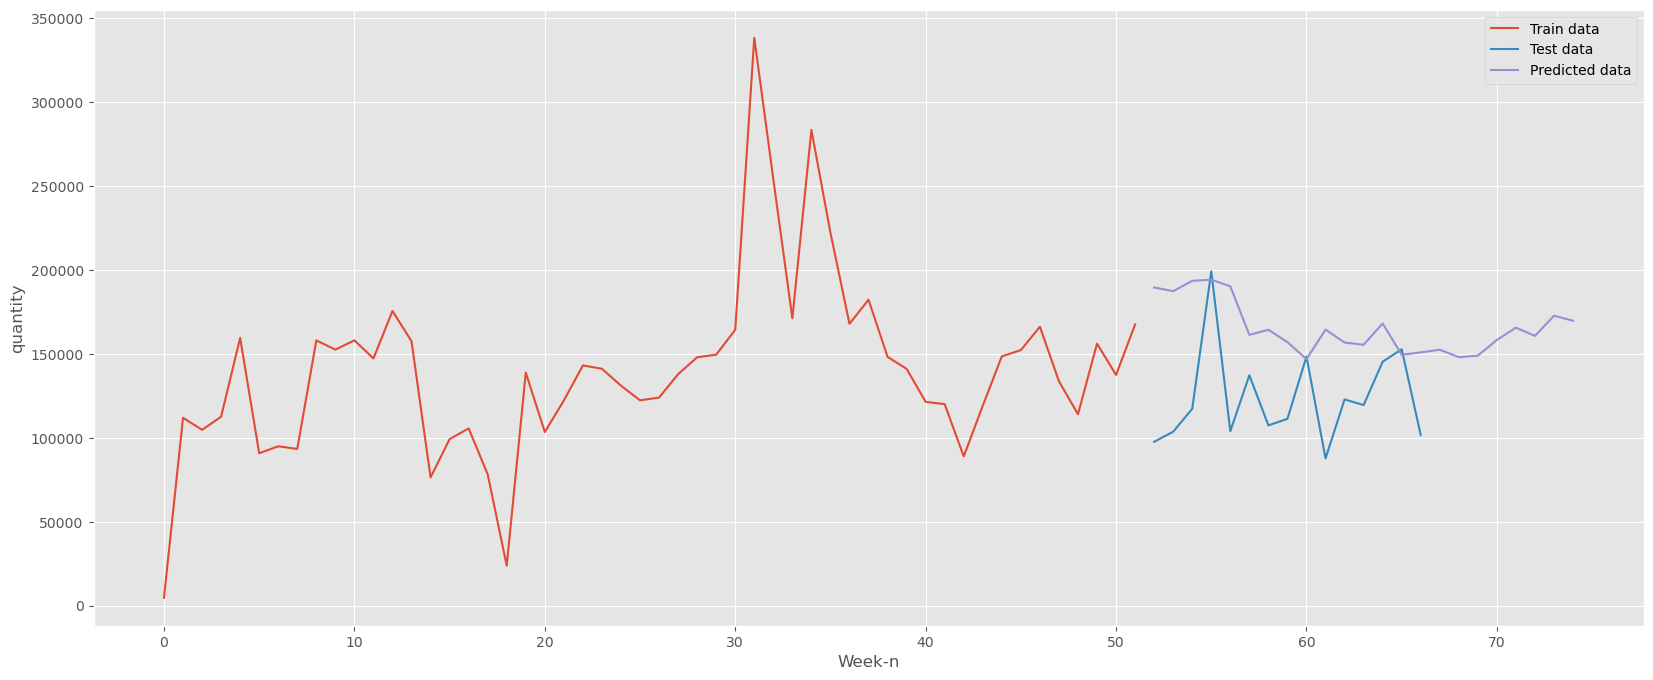

In [65]:
# Dalam kutipan tersebut, ACF plot menunjukkan bahwa moving average (MA) order yang dapat digunakan adalah 0 dan 1.
# Sementara itu, PACF plot menunjukkan bahwa urutan autoregresif (AR) yang dapat digunakan adalah 0, 1, 2, 14 dan 16. 

# Copu data to data_product2
data_product2 = product2.copy()

# Set the index to a range of integers
data_product2.index = range(len(data_product2))

# Split the data_product2 into train and test sets
train_product2 = data_product2.iloc[:52]
test_product2 = data_product2.iloc[52:]

# Create and fit the SARIMAX model
model_product2 = ARIMA(train_product2, order=(16, 1, 0))
model_fit_product2 = model_product2.fit()

# Generate predictions for the test set
predictions_product2 = model_fit_product2.forecast(steps=len(test_product2)+8)

# Evaluate the model performance (MAPE & MAE)
mape_product2 = mean_absolute_percentage_error(test_product2, predictions_product2[:15])
mae_product2 = mean_absolute_error(test_product2, predictions_product2[:15])
print(f'MAPE : {mape_product2}')
print(f'MAE : {mae_product2}')

# Plot the original data_product2 and the predicted values
plt.figure(figsize=(20,8))
plt.plot(train_product2.index, train_product2, label='Train data')
plt.plot(test_product2.index, test_product2, label='Test data')
plt.plot(predictions_product2.index, predictions_product2, label='Predicted data')
plt.legend()
plt.xlabel('Week-n')
plt.ylabel('quantity')
plt.show()

Diatas merupakan prediksi terbaik yang dapat diperoleh menggunakan model ARIMA dengan MAPE sebesar 0.43% (Cukup besar). Hal ini tidak cukup baik karena belum dapat memprediksi pola data test dengan cukup baik dan akurasinya yang masih belum baik. walaupun masih ada sedikit miss pada beberapa prediksi test, namun dalam plot ini sudah bisa sedikit merepresentasikan data test. hal ini masih belum dapat memberikan kontribusi yang baik dalam mengambil keputusan ataupun kebijakan, karena hasilnya yang masih kurang representatif.

`Hasil ini sudah dilakukan menggunakan beberapa kombinasi dari nilai AR dan MA yang sudah ditemukan dan D dari stasioner pada differencial 1`

### SARIMAX

MAPE : 0.2668446941799797
MAE : 30362.665710252764


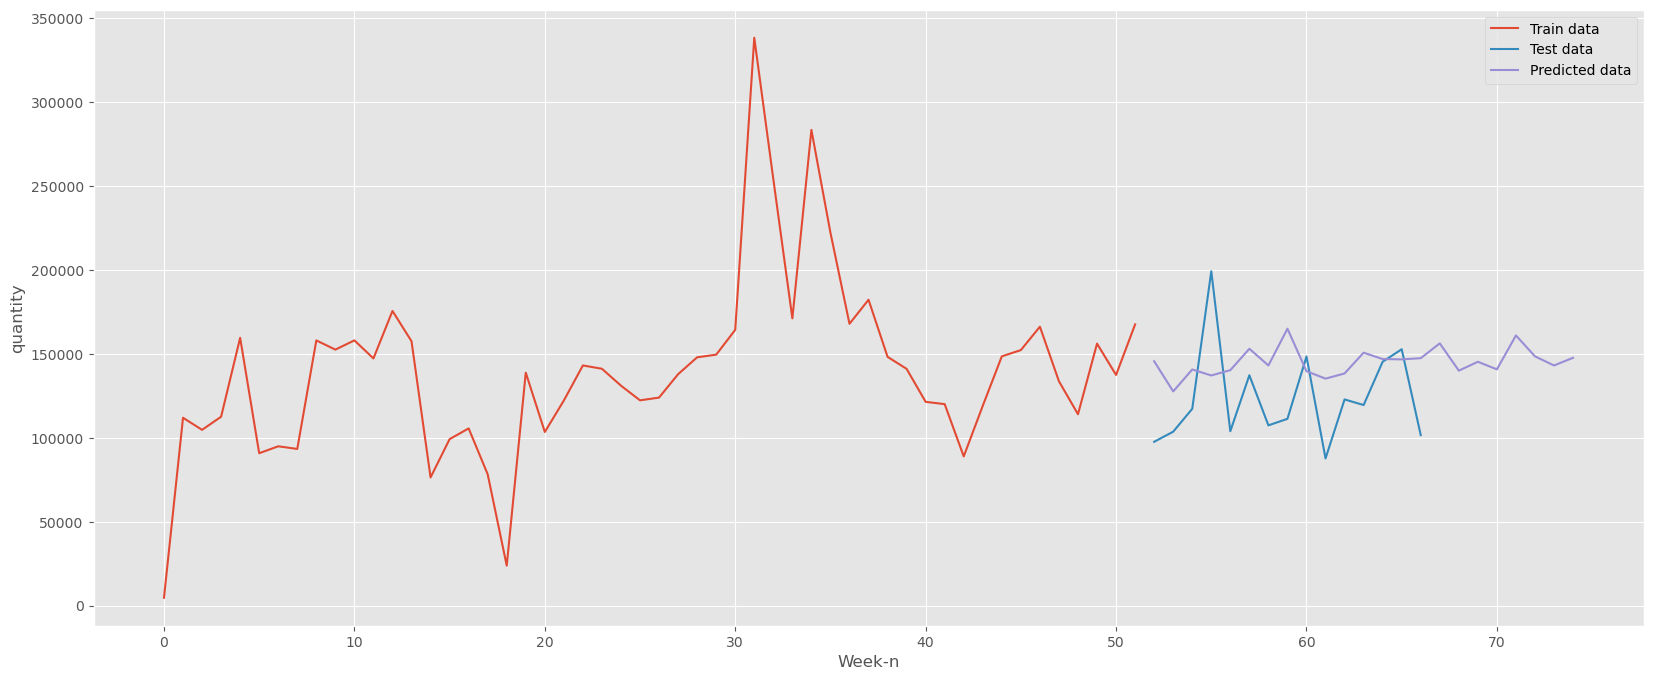

In [66]:
import warnings
warnings.filterwarnings('ignore')

# Load data_product2S
data_product2S = product2.copy()

# Set the index to a range of integers
data_product2S.index = range(len(data_product2S))

# Set the frequency of the data_product2S (assuming daily data_product2S)
frequency_product2S = 4

# Split the data_product2S into train and test sets
train_product2S = data_product2S.iloc[:52]
test_product2S = data_product2S.iloc[52:]

# Create and fit the SARIMAX model
model_product2S = SARIMAX(train_product2S, order=(2, 1, 0), seasonal_order=(3, 1, 3, frequency_product2S))
model_fit_product2S = model_product2S.fit(disp=False)

# Generate predictions for the test set
predictions_product2S = model_fit_product2S.forecast(steps=len(test_product2S)+8)

# Evaluate the model performance (MAPE & MAE)
mape_product2S = mean_absolute_percentage_error(test_product2S, predictions_product2S[:15])
mae_product2S = mean_absolute_error(test_product2S, predictions_product2S[:15])
print(f'MAPE : {mape_product2S}')
print(f'MAE : {mae_product2S}')

# Plot the original data_product2S and the predicted values
plt.figure(figsize=(20,8))
plt.plot(train_product2S.index, train_product2S, label='Train data')
plt.plot(test_product2S.index, test_product2S, label='Test data')
plt.plot(predictions_product2S.index, predictions_product2S, label='Predicted data')
plt.legend()
plt.xlabel('Week-n')
plt.ylabel('quantity')
plt.show()


Diatas merupakan prediksi terbaik yang dapat diperoleh menggunakan model SARIMAX dengan MAPE sebesar 0.26% (lebih kecil dari ARIMA). Hal ini cukup baik karena sudah dapat memprediksi pola data test dengan cukup baik walupun akurasinya yang masih belum baik. walaupun masih ada sedikit miss pada beberapa prediksi test, namun dalam plot ini dapat merepresentasikan data test dengan cukup baik untuk peningkatan dan penurunannya. hal ini baik adanya karena dari model ini dapat memberikan kontibusi dan membuat keputusan yang tepat dari model ini. (Cukup baik dari pada ARIMA dalam menjelaskan data setelah periode test) 

`Hasil ini sudah dilakukan menggunakan beberapa kombinasi dari nilai AR dan MA yang sudah ditemukan, namun dengan seasonal order menggunakan AR dan MA maksimal saja`

MAPE: 0.46856462393797604
MAE: 52534.31333530662


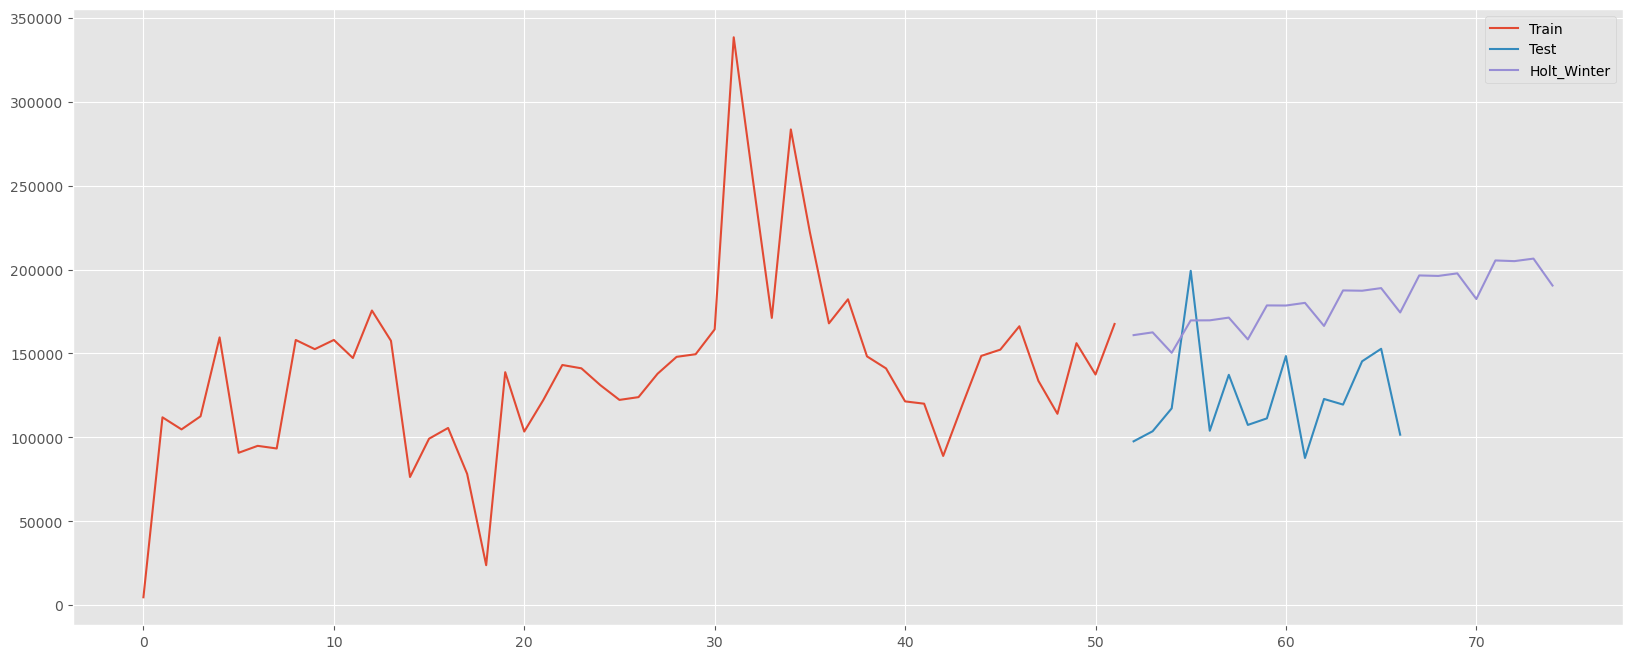

In [67]:
# Split the data_product2S into train and test sets
train_product2S = data_product2S.iloc[:52]
test_product2S = data_product2S.iloc[52:]

y_hat_avg = test_product2S.copy()
fit1 = ExponentialSmoothing(np.asarray(train_product2S), seasonal_periods=4, trend='additive', seasonal='multiplicative').fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test_product2S)+8)
Holt_Winter= pd.DataFrame(y_hat_avg['Holt_Winter'])
Holt_Winter.index=range(52, 75)

mape = mean_absolute_percentage_error(test_product2S, Holt_Winter[:15])
mae = mean_absolute_error(test_product2S, Holt_Winter[:15])
print("MAPE:", mape)
print("MAE:", mae)


plt.figure(figsize=(20,8))
plt.plot(train_product2S.index, train_product2S, label='Train')
plt.plot(test_product2S.index, test_product2S, label='Test')
plt.plot(Holt_Winter.index, Holt_Winter, label='Holt_Winter')
plt.legend(loc='best')
plt.show()


Diatas merupakan prediksi terbaik yang dapat diperoleh menggunakan model Holt_Winter dengan MAPE sebesar 0.46% (Cukup besar). Hal ini tidak cukup baik karena prediksi pola data test dengan cukup jauh (plotnya belum bisa memrepresentasikan data test).

`Hasil ini sudah dilakukan menggunakan beberapa kombinasi dari model additive dan multiplicative`

### MODEL TERPILIH 

- Pada data Product2, model terpilih adalah model SARIMAX kareana nilai error yang lebih kecil dan bentuk plot yang lebih tepat dibandingkan lainnya dalam memprediksi data test. Walaupun dalam plot prediksi untuk data test masih belum tepat namun sudah cukup dapat menjelaskan. dibandingkan dengan all_produk dan produk 1 mape nya cenderung lebih besar karena datanya yang masih belum stasioner pada tingat level namun stasioner pada tingkat first difference (stasioner saat sudah di difference 1 kali)

- Dari Model terpilih dapat dilihat bahwa, diperkirakan penjualan akan stabil selama 2 bulan kedepan. mungkin bisa dilakukan beberapa promosi atau atau discount agar pembelian lebih meningkat lagi.

## Product 3

### ARMA

MAPE : 0.22752238422183246
MAE : 25278.94889465603


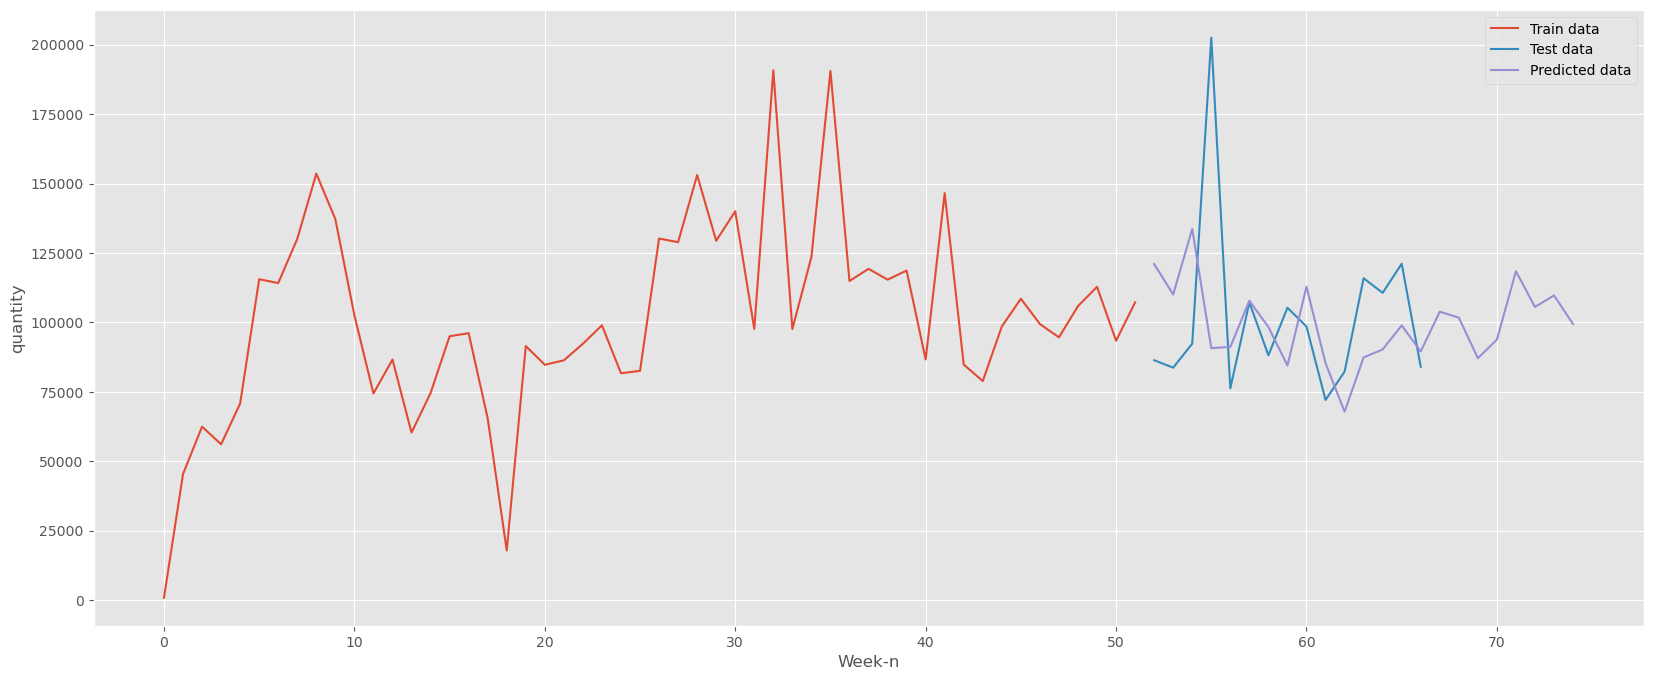

In [68]:
# Dalam kutipan tersebut, ACF plot menunjukkan bahwa moving average (MA) order yang dapat digunakan adalah 0, 1 dan 2.
# Sementara itu, PACF plot menunjukkan bahwa urutan autoregresif (AR) yang dapat digunakan adalah 0 dan 1. 

# Copu data to data_product3
data_product3 = product3.copy()

# Set the index to a range of integers
data_product3.index = range(len(data_product3))

# Split the data_product3 into train and test sets
train_product3 = data_product3.iloc[:52]
test_product3 = data_product3.iloc[52:]

# Create and fit the SARIMAX model
model_product3 = ARIMA(train_product3, order=(18, 0, 8))
model_fit_product3 = model_product3.fit()

# Generate predictions for the test set
predictions_product3 = model_fit_product3.forecast(steps=len(test_product3)+8)

# Evaluate the model performance (MAPE & MAE)
mape_product3 = mean_absolute_percentage_error(test_product3, predictions_product3[:15])
mae_product3 = mean_absolute_error(test_product3, predictions_product3[:15])
print(f'MAPE : {mape_product3}')
print(f'MAE : {mae_product3}')

# Plot the original data_product3 and the predicted values
plt.figure(figsize=(20,8))
plt.plot(train_product3.index, train_product3, label='Train data')
plt.plot(test_product3.index, test_product3, label='Test data')
plt.plot(predictions_product3.index, predictions_product3, label='Predicted data')
plt.legend()
plt.xlabel('Week-n')
plt.ylabel('quantity')
plt.show()

Diatas merupakan prediksi terbaik yang dapat diperoleh menggunakan model ARMA dengan MAPE sebesar 0.22% (Cukup Kecil). Hal ini cukup baik karena sudah dapat memprediksi pola data test dengan cukup baik walupun akurasinya yang masih belum baik. walaupun masih ada sedikit miss pada beberapa prediksi test, namun dalam plot ini dapat merepresentasikan data test dengan cukup baik untuk peningkatan dan penurunannya. hal ini baik adanya karena dari model ini dapat memberikan kontibusi dan membuat keputusan yang tepat dari model ini. 

`Hasil ini sudah dilakukan menggunakan beberapa kombinasi dari nilai AR dan MA yang sudah ditemukan`

### SARIMAX

MAPE : 0.17971982374616863
MAE : 20758.674307367775


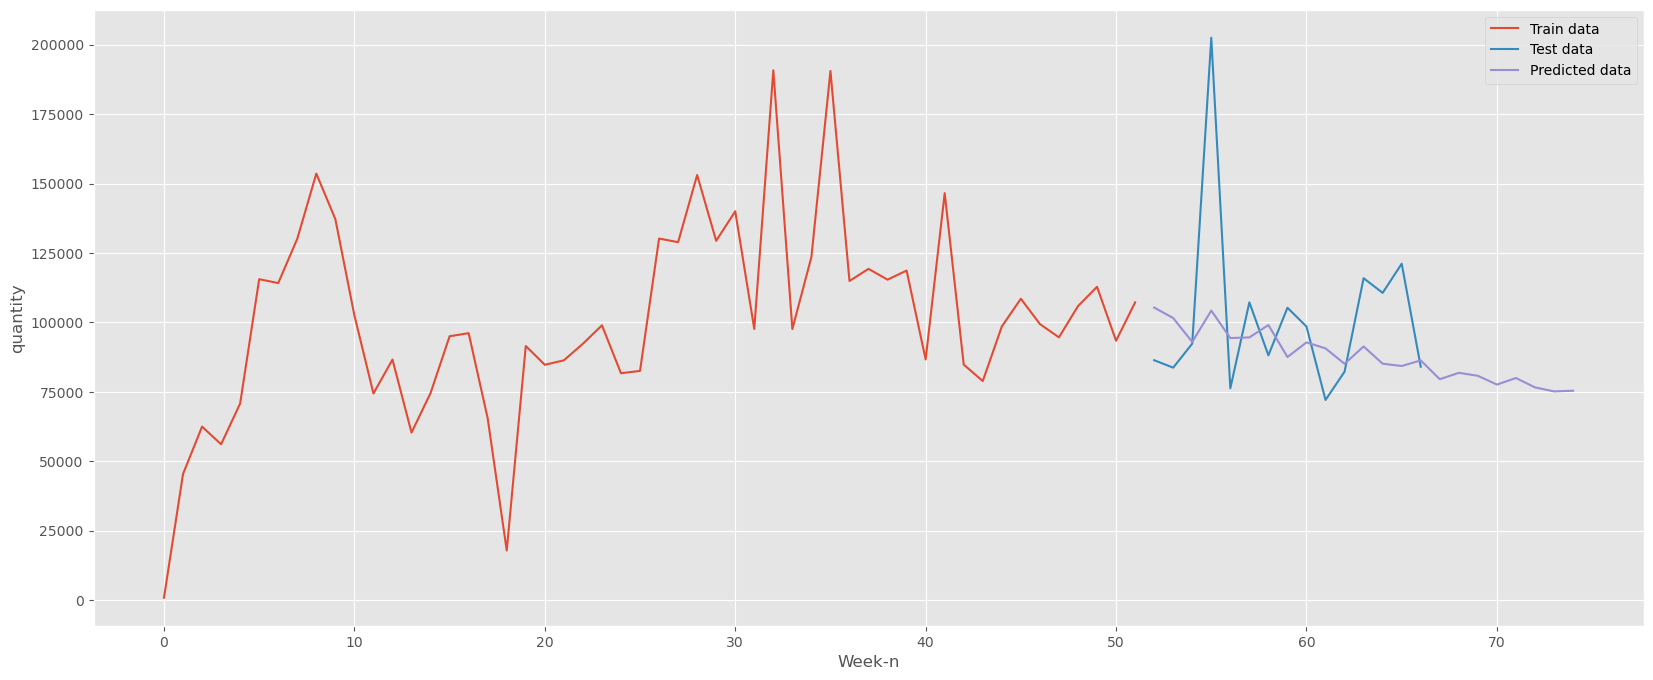

In [69]:
import warnings
warnings.filterwarnings('ignore')

# Load data_product3S
data_product3S = product3.copy()

# Set the index to a range of integers
data_product3S.index = range(len(data_product3S))

# Set the frequency of the data_product3S (assuming daily data_product3S)
frequency_product3S = 4

# Split the data_product3S into train and test sets
train_product3S = data_product3S.iloc[:52]
test_product3S = data_product3S.iloc[52:]

# Create and fit the SARIMAX model
model_product3S = SARIMAX(train_product3S, order=(1, 0, 1), seasonal_order=(3, 0, 3, frequency_product3S))
model_fit_product3S = model_product3S.fit(disp=False)

# Generate predictions for the test set
predictions_product3S = model_fit_product3S.forecast(steps=len(test_product3S)+8)

# Evaluate the model performance (MAPE & MAE)
mape_product3S = mean_absolute_percentage_error(test_product3S, predictions_product3S[:15])
mae_product3S = mean_absolute_error(test_product3S, predictions_product3S[:15])
print(f'MAPE : {mape_product3S}')
print(f'MAE : {mae_product3S}')

# Plot the original data_product3S and the predicted values
plt.figure(figsize=(20,8))
plt.plot(train_product3S.index, train_product3S, label='Train data')
plt.plot(test_product3S.index, test_product3S, label='Test data')
plt.plot(predictions_product3S.index, predictions_product3S, label='Predicted data')
plt.legend()
plt.xlabel('Week-n')
plt.ylabel('quantity')
plt.show()


Diatas merupakan prediksi terbaik yang dapat diperoleh menggunakan model SARIMAX dengan MAPE sebesar 0.17% (Cukup Kecil). Hal ini cukup baik karena sudah dapat memprediksi pola data test dengan cukup baik walupun akurasinya yang masih belum baik. walaupun nilai MAPE yang cenderung lebih kecil dari model ARMA, namun dalam SARIMAX bentuk plotnya sangat tidak mirip dengan data test. sehingga model ini tidak lebih baik dari model ARMA

`Hasil ini sudah dilakukan menggunakan beberapa kombinasi dari nilai AR dan MA yang sudah ditemukan, namun dengan seasonal order menggunakan AR dan MA maksimal saja`

### Hold_Winter

MAPE: 0.23039589003932118
MAE: 23314.411942355753


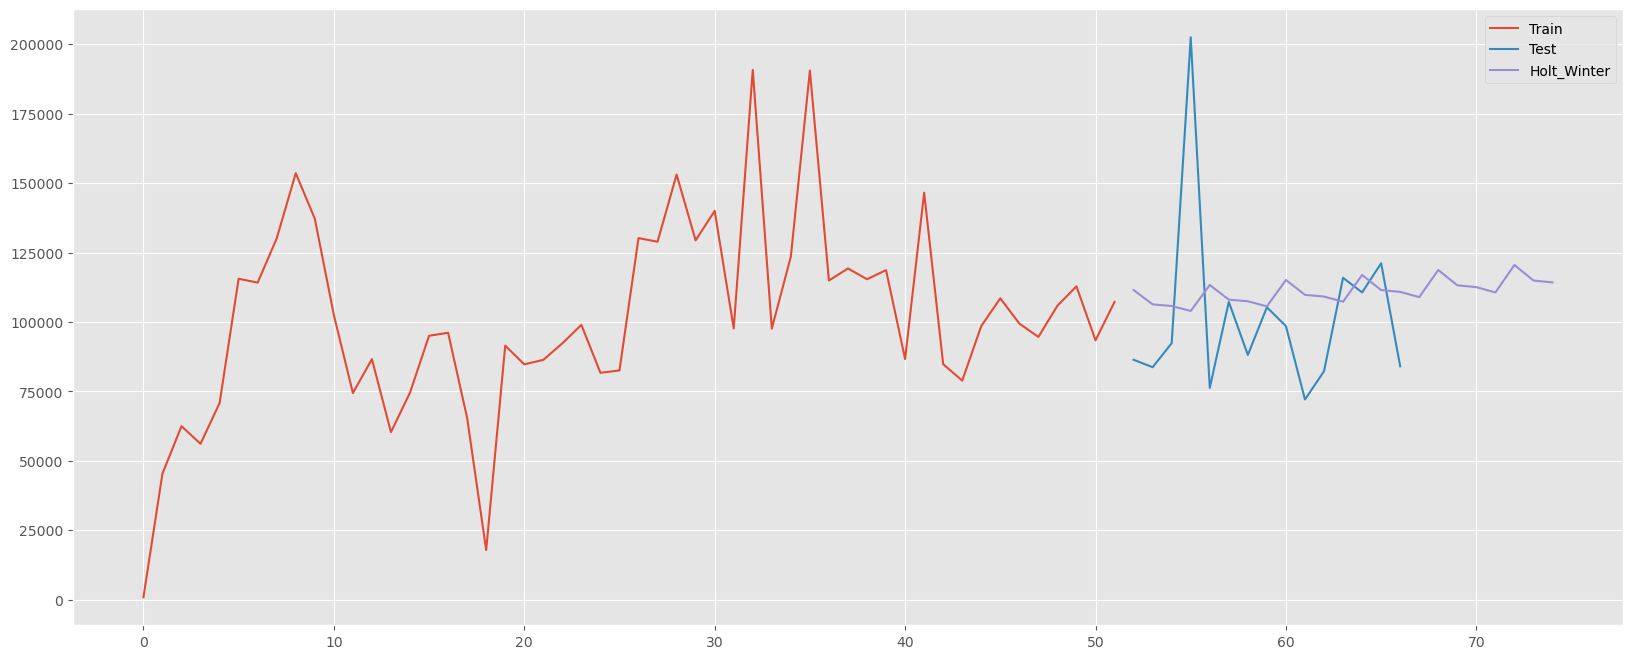

In [70]:
# Split the data_product3S into train and test sets
train_product3S = data_product3S.iloc[:52]
test_product3S = data_product3S.iloc[52:]

y_hat_avg = test_product3S.copy()
fit1 = ExponentialSmoothing(np.asarray(train_product3S), seasonal_periods=4, trend='additive', seasonal='multiplicative').fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test_product3S)+8)
Holt_Winter= pd.DataFrame(y_hat_avg['Holt_Winter'])
Holt_Winter.index=range(52, 75)

mape = mean_absolute_percentage_error(test_product3S, Holt_Winter[:15])
mae = mean_absolute_error(test_product3S, Holt_Winter[:15])
print("MAPE:", mape)
print("MAE:", mae)


plt.figure(figsize=(20,8))
plt.plot(train_product3S.index, train_product3S, label='Train')
plt.plot(test_product3S.index, test_product3S, label='Test')
plt.plot(Holt_Winter.index, Holt_Winter, label='Holt_Winter')
plt.legend(loc='best')
plt.show()


Diatas merupakan prediksi terbaik yang dapat diperoleh menggunakan model Holt_Winter dengan MAPE sebesar 0.23% (Cukup besar). Hal ini tidak cukup baik karena prediksi pola data test dengan cukup jauh (plotnya belum bisa memrepresentasikan data test).

`Hasil ini sudah dilakukan menggunakan beberapa kombinasi dari model additive dan multiplicative`

### MODEL TERPILIH 

- Pada data Product3, model terpilih adalah model ARMA walaupun MAPE lebih besar dari SARIMAX namun bentuk plot yang lebih tepat dibandingkan lainnya dalam memprediksi data test. Walaupun dalam plot prediksi untuk data test masih belum cukup tepat namun sudah cukup dapat menjelaskan.

- Dari Model terpilih dapat dilihat bahwa, diperkirakan pada dalam 2 bulan kedepan penjualan akan cenderung meningkat walaupun terdapat beberpa kali penurunan kecil. Mungkin dari prediksi ini dapat dibuat kebijakan agar meminimalisir penuruan agar revenue yang diterima lebih besar.

## Product 4

### ARIMA

MAPE : 0.16519848298213394
MAE : 17444.50078447728


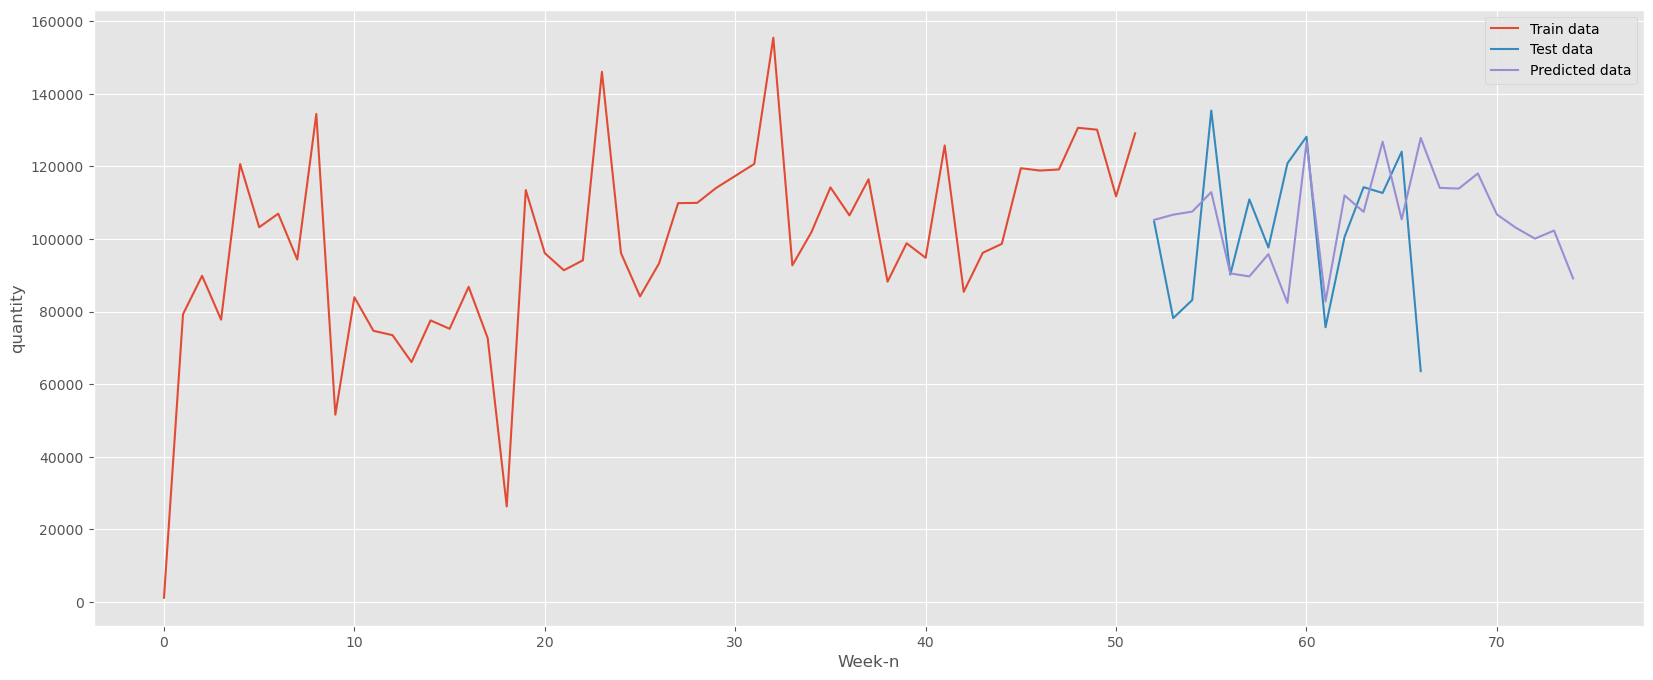

In [71]:
# Dalam kutipan tersebut, ACF plot menunjukkan bahwa moving average (MA) order yang dapat digunakan adalah 0, 1, 9 dan 10.
# Sementara itu, PACF plot menunjukkan bahwa urutan autoregresif (AR) yang dapat digunakan adalah 0, 1, 2 dan 8. 

# Copu data to data_product4
data_product4 = product4.copy()

# Set the index to a range of integers
data_product4.index = range(len(data_product4))

# Split the data_product4 into train and test sets
train_product4 = data_product4.iloc[:52]
test_product4 = data_product4.iloc[52:]

# Create and fit the SARIMAX model
model_product4 = ARIMA(train_product4, order=(8, 1, 10))
model_fit_product4 = model_product4.fit()

# Generate predictions for the test set
predictions_product4 = model_fit_product4.forecast(steps=len(test_product4)+8)

# Evaluate the model performance (MAPE & MAE)
mape_product4 = mean_absolute_percentage_error(predictions_product4[:15],test_product4)
mae_product4 = mean_absolute_error(predictions_product4[:15],test_product4)
print(f'MAPE : {mape_product4}')
print(f'MAE : {mae_product4}')

# Plot the original data_product5S and the predicted values
plt.figure(figsize=(20,8))
plt.plot(train_product4.index, train_product4, label='Train data')
plt.plot(test_product4.index, test_product4, label='Test data')
plt.plot(predictions_product4.index, predictions_product4, label='Predicted data')
plt.legend()
plt.xlabel('Week-n')
plt.ylabel('quantity')
plt.show()

Diatas merupakan prediksi terbaik yang dapat diperoleh menggunakan model ARIMA dengan MAPE sebesar 0.16% (Cukup kecil). Hal ini cukup baik karena dapat memprediksi pola data test dengan baik walaupun akurasinya yang masih belum baik. walaupun masih ada sedikit miss pada beberapa prediksi test, namun dalam plot ini sudah bisa  merepresentasikan data test. Dalam plot tersebut sudah bisa memberikan kontribusi dalam pengambilan keputusan.

`Hasil ini sudah dilakukan menggunakan beberapa kombinasi dari nilai AR dan MA yang sudah ditemukan dan D dari stasioner pada differencial 1`

### SARIMAX

MAPE : 0.2797480641528855
MAE : 39917.96611392703


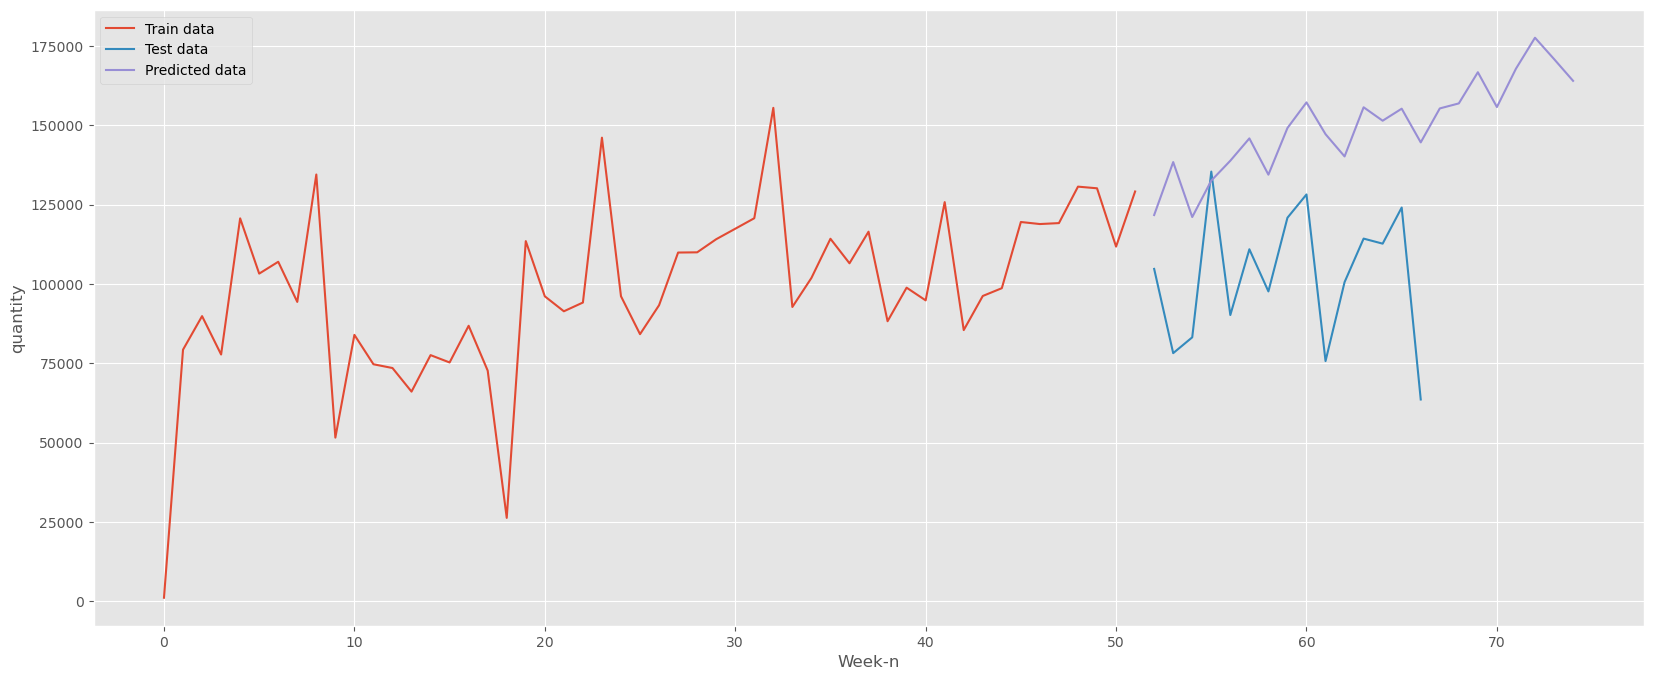

In [72]:
import warnings
warnings.filterwarnings('ignore')

# Load data_product4S
data_product4S = product4.copy()

# Set the index to a range of integers
data_product4S.index = range(len(data_product4S))

# Set the frequency of the data_product4S (assuming daily data_product4S)
frequency_product4S = 4

# Split the data_product4S into train and test sets
train_product4S = data_product4S.iloc[:52]
test_product4S = data_product4S.iloc[52:]

# Create and fit the SARIMAX model
model_product4S = SARIMAX(train_product4S, order=(2, 1, 1), seasonal_order=(3, 1, 3, frequency_product4S))
model_fit_product4S = model_product4S.fit(disp=False)

# Generate predictions for the test set
predictions_product4S = model_fit_product4S.forecast(steps=len(test_product4S)+8)

# Evaluate the model performance (MAPE & MAE)
mape_product4S = mean_absolute_percentage_error(predictions_product4S[:15],test_product4S)
mae_product4S = mean_absolute_error(predictions_product4S[:15],test_product4S)
print(f'MAPE : {mape_product4S}')
print(f'MAE : {mae_product4S}')

# Plot the original data_product5S and the predicted values
plt.figure(figsize=(20,8))
plt.plot(train_product4S.index, train_product4S, label='Train data')
plt.plot(test_product4S.index, test_product4S, label='Test data')
plt.plot(predictions_product4S.index, predictions_product4S, label='Predicted data')
plt.legend()
plt.xlabel('Week-n')
plt.ylabel('quantity')
plt.show()


Diatas merupakan prediksi terbaik yang dapat diperoleh menggunakan model SARIMAX dengan MAPE sebesar 0.27% (cukup besar). dilihat dari plotnya, dalam model SARIMAX ini belum bisa memberikan kontribusi karena bentuk plonya sangat berbeda dengan data test. sehingga bentuknya melenceng cukup banyak.

`Hasil ini sudah dilakukan menggunakan beberapa kombinasi dari nilai AR dan MA yang sudah ditemukan, namun dengan seasonal order menggunakan AR dan MA maksimal saja`

### Holt_Winter

MAPE: 0.28809650603481884
MAE: 24703.752952813604


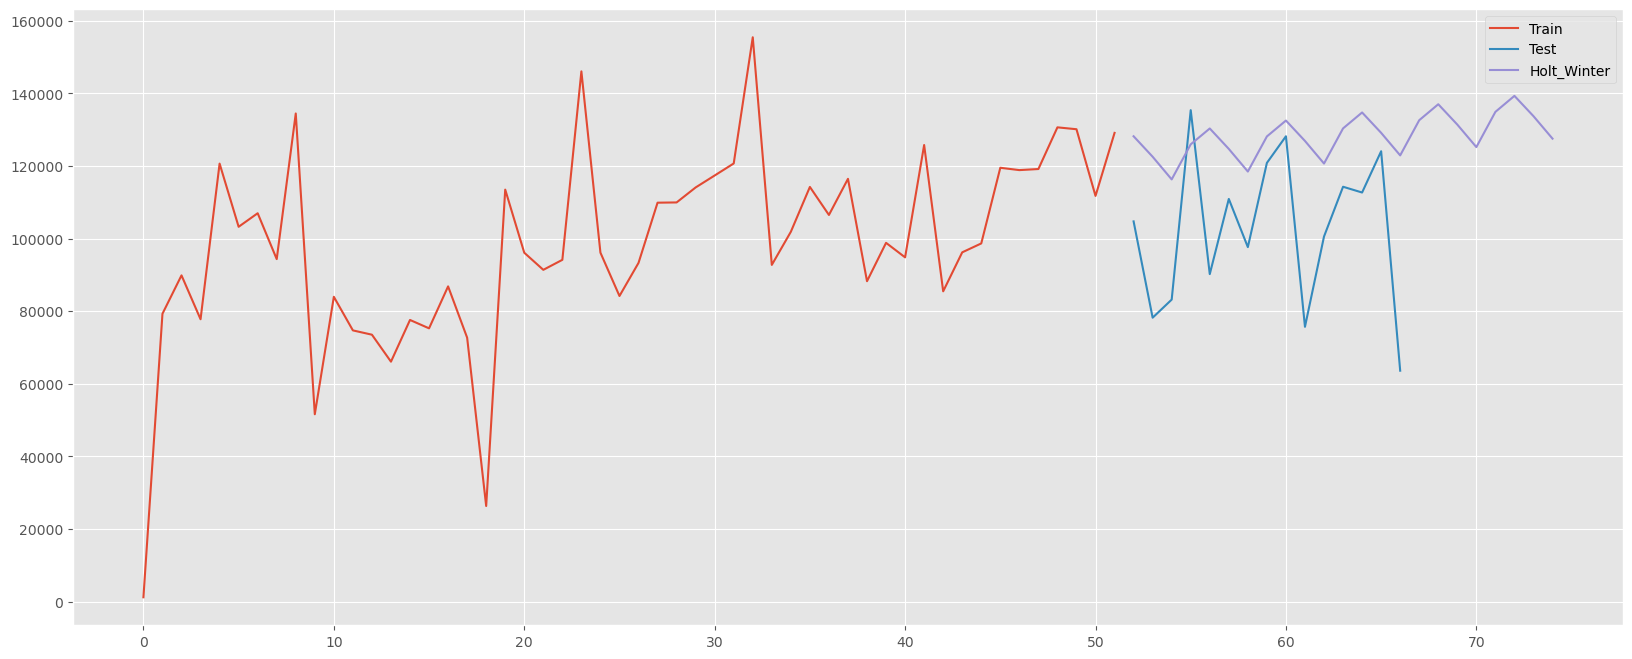

In [73]:
# Split the data_product4S into train and test sets
train_product4S = data_product4S.iloc[:52]
test_product4S = data_product4S.iloc[52:]

y_hat_avg = test_product4S.copy()
fit1 = ExponentialSmoothing(np.asarray(train_product4S), seasonal_periods=4, trend='multiplicative', seasonal='additive').fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test_product4S)+8)
Holt_Winter= pd.DataFrame(y_hat_avg['Holt_Winter'])
Holt_Winter.index=range(52, 75)

mape = mean_absolute_percentage_error(test_product4S, Holt_Winter[:15])
mae = mean_absolute_error(test_product4S, Holt_Winter[:15])
print("MAPE:", mape)
print("MAE:", mae)


plt.figure(figsize=(20,8))
plt.plot(train_product4S.index, train_product4S, label='Train')
plt.plot(test_product4S.index, test_product4S, label='Test')
plt.plot(Holt_Winter.index, Holt_Winter, label='Holt_Winter')
plt.legend(loc='best')
plt.show()


Diatas merupakan prediksi terbaik yang dapat diperoleh menggunakan model Holt_Winter dengan MAPE sebesar 0.28% (Cukup besar). Hal ini tidak cukup baik karena prediksi dengan pola data test cukup jauh (plotnya belum bisa memrepresentasikan data test).

`Hasil ini sudah dilakukan menggunakan beberapa kombinasi dari model additive dan multiplicative`

### MODEL TERPILIH 

- Pada data Product4, model terpilih adalah model ARIMA yang mana nilai MAPE yang lebih kecil dari model lainnya dan bentuk plot yang paling mendekati pola data test. sehingga model ARIMA merupakan model terbaik untuk memprediksi product4

- Dari Model terpilih dapat dilihat bahwa, diperkirakan pada dalam 2 bulan kedepan penjualan akan cenderung menurun sedikit demi sedikit. hal ini perlu menjadi sorotan dan perlu segera diberikan kebijkan agar penurunannya tidak terjadi atau diperlambat.

## Product 5

### ARMA

MAPE : 0.21514052397257483
MAE : 14260.13921849156


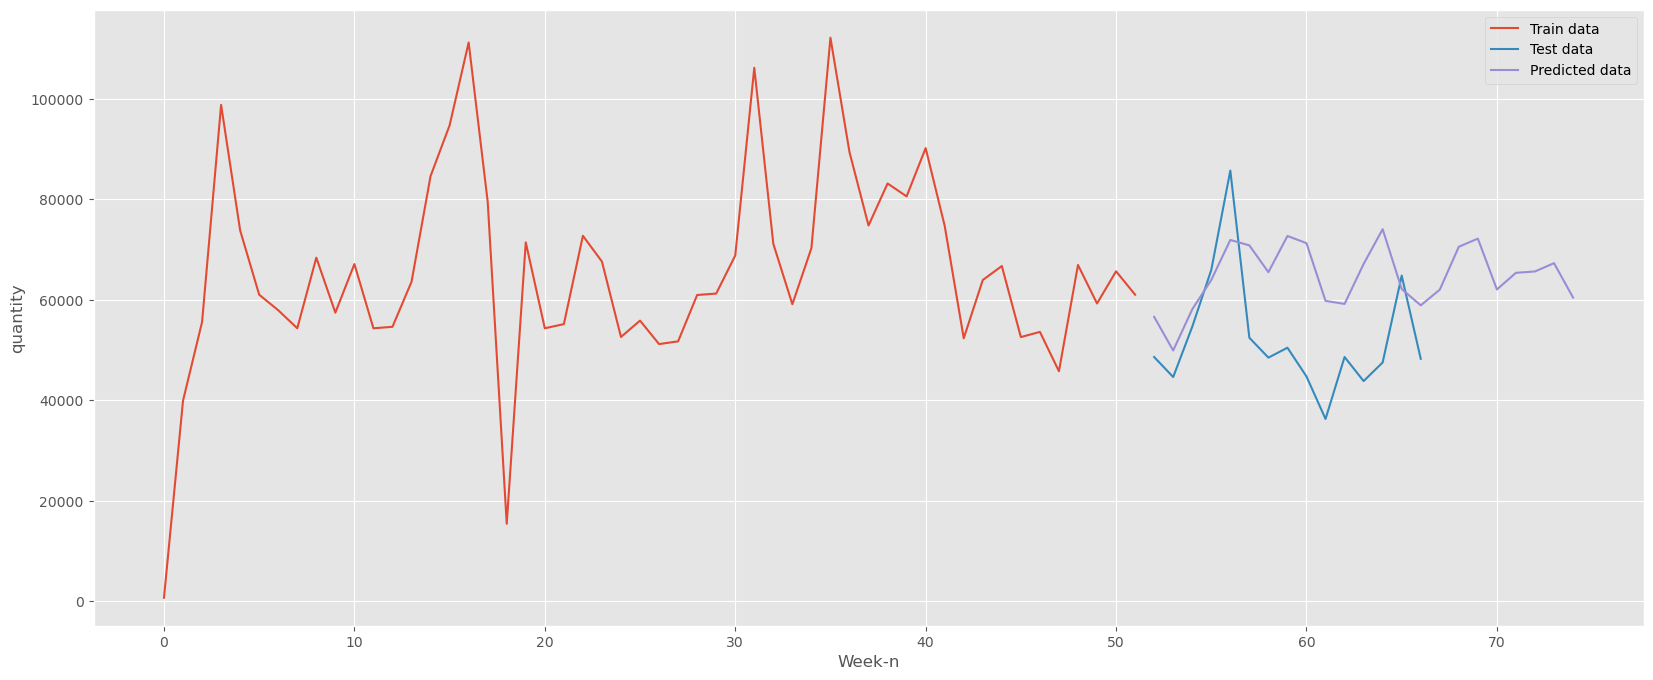

In [74]:
# Dalam kutipan tersebut, ACF plot menunjukkan bahwa moving average (MA) order yang dapat digunakan adalah 0 dan 1 14,15, 30,31.
# Sementara itu, PACF plot menunjukkan bahwa urutan autoregresif (AR) yang dapat digunakan adalah 0 dan 1, 10, 18.

# Copu data to data_product5
data_product5 = product5.copy()

# Set the index to a range of integers
data_product5.index = range(len(data_product5))

# Split the data_product5 into train and test sets
train_product5 = data_product5.iloc[:52]
test_product5 = data_product5.iloc[52:]

# Create and fit the SARIMAX model
model_product5 = ARIMA(train_product5, order=(10, 0, 30))
model_fit_product5 = model_product5.fit()

# Generate predictions for the test set
predictions_product5 = model_fit_product5.forecast(steps=len(test_product5)+8)

# Evaluate the model performance (MAPE & MAE)
mape_product5 = mean_absolute_percentage_error(predictions_product5[:15],test_product5)
mae_product5 = mean_absolute_error(predictions_product5[:15],test_product5)
print(f'MAPE : {mape_product5}')
print(f'MAE : {mae_product5}')

# Plot the original data_product5S and the predicted values
plt.figure(figsize=(20,8))
plt.plot(train_product5.index, train_product5, label='Train data')
plt.plot(test_product5.index, test_product5, label='Test data')
plt.plot(predictions_product5.index, predictions_product5, label='Predicted data')
plt.legend()
plt.xlabel('Week-n')
plt.ylabel('quantity')
plt.show()


Diatas merupakan prediksi terbaik yang dapat diperoleh menggunakan model ARMA dengan MAPE sebesar 0.21% (Cukup besar). Hal ini tidak cukup baik karena belum dapat memprediksi pola data test dengan cukup baik dan akurasinya yang masih belum baik. Untuk data plot masih belum dapat merepresentasikan data test dengan baik.

`Hasil ini sudah dilakukan menggunakan beberapa kombinasi dari nilai AR dan MA yang sudah ditemukan`

### SARIMAX

MAPE : 0.19077250459143472
MAE : 10143.593304993574


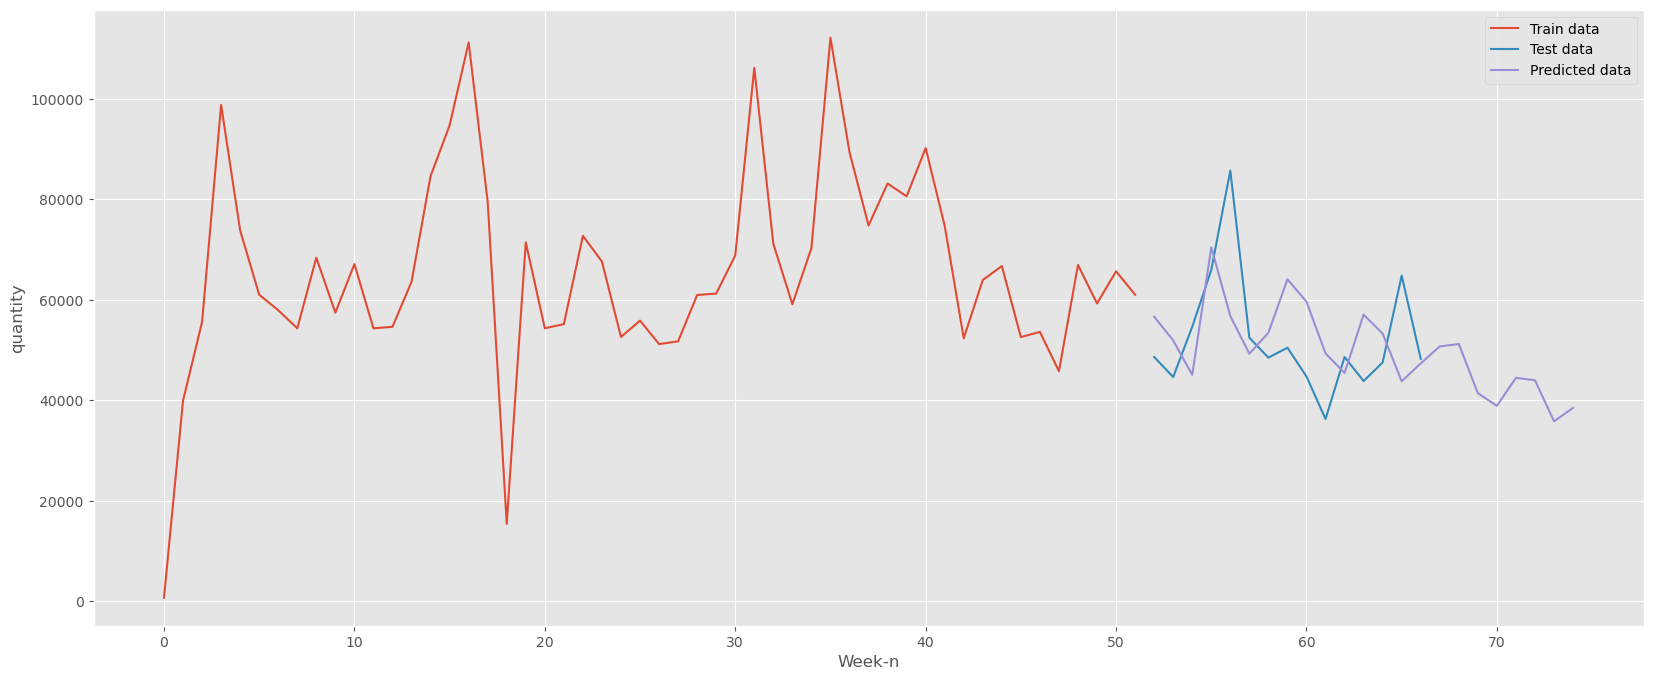

In [75]:
import warnings
warnings.filterwarnings('ignore')

# Load data_product5S
data_product5S = product5.copy()

# Set the index to a range of integers
data_product5S.index = range(len(data_product5S))

# Set the frequency of the data_product5S (assuming daily data_product5S)
frequency_product5S = 4

# Split the data_product5S into train and test sets
train_product5S = data_product5S.iloc[:52]
test_product5S = data_product5S.iloc[52:]

# Create and fit the SARIMAX model
model_product5S = SARIMAX(train_product5S, order=(1, 0, 1), seasonal_order=(3, 0, 3, frequency_product5S))
model_fit_product5S = model_product5S.fit(disp=False)

# Generate predictions for the test set
predictions_product5S = model_fit_product5S.forecast(steps=len(test_product5S)+8)

# Evaluate the model performance (MAPE & MAE)
mape_product5S = mean_absolute_percentage_error(predictions_product5S[:15],test_product5S)
mae_product5S = mean_absolute_error(predictions_product5S[:15],test_product5S)
print(f'MAPE : {mape_product5S}')
print(f'MAE : {mae_product5S}')

# Plot the original data_product5S and the predicted values
plt.figure(figsize=(20,8))
plt.plot(train_product5S.index, train_product5S, label='Train data')
plt.plot(test_product5S.index, test_product5S, label='Test data')
plt.plot(predictions_product5S.index, predictions_product5S, label='Predicted data')
plt.legend()
plt.xlabel('Week-n')
plt.ylabel('quantity')
plt.show()


Diatas merupakan prediksi terbaik yang dapat diperoleh menggunakan model SARIMAX dengan MAPE sebesar 0.19% (lebih kecil dari ARIMA). Hal ini cukup baik karena sudah dapat memprediksi pola data test dengan cukup baik walupun akurasinya yang masih belum baik. walaupun masih ada sedikit miss pada beberapa prediksi test, namun dalam plot ini dapat merepresentasikan data test dengan cukup baik untuk peningkatan dan penurunannya. hal ini baik adanya karena dari model ini dapat memberikan kontibusi dan membuat keputusan yang tepat dari model ini. (Cukup baik dari pada ARIMA dalam menjelaskan data setelah periode test) 

`Hasil ini sudah dilakukan menggunakan beberapa kombinasi dari nilai AR dan MA yang sudah ditemukan, namun dengan seasonal order menggunakan AR dan MA maksimal saja`

### Holt_Winter

MAPE: 0.15543824668614445
MAE: 8394.297825932535


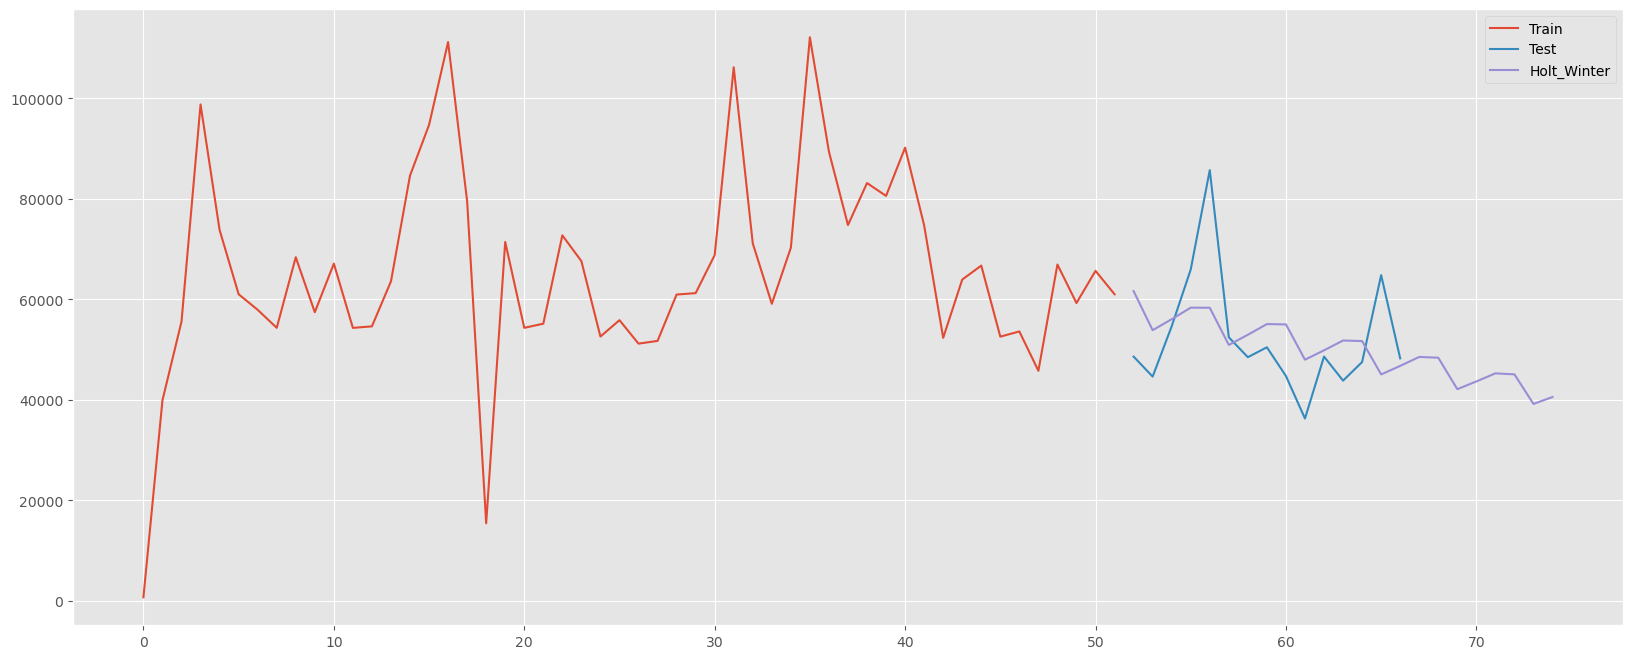

In [76]:
# Split the data_product5S into train and test sets
train_product5S = data_product5S.iloc[:52]
test_product5S = data_product5S.iloc[52:]

y_hat_avg = test_product5S.copy()
fit1 = ExponentialSmoothing(np.asarray(train_product5S), seasonal_periods=4, trend='additive', seasonal='multiplicative').fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test_product5S)+8)
Holt_Winter= pd.DataFrame(y_hat_avg['Holt_Winter'])
Holt_Winter.index=range(52, 75)

mape = mean_absolute_percentage_error(test_product5S, Holt_Winter[:15])
mae = mean_absolute_error(test_product5S, Holt_Winter[:15])
print("MAPE:", mape)
print("MAE:", mae)


plt.figure(figsize=(20,8))
plt.plot(train_product5S.index, train_product5S, label='Train')
plt.plot(test_product5S.index, test_product5S, label='Test')
plt.plot(Holt_Winter.index, Holt_Winter, label='Holt_Winter')
plt.legend(loc='best')
plt.show()


Diatas merupakan prediksi terbaik yang dapat diperoleh menggunakan model Holt_Winter dengan MAPE sebesar 0.15% (Cukup kecil). Pada model ini merupakan model yang memiliki MAPE terkecil dibandingkan ARMA dan SARIMAX dalam menjelaskan data product 5. 

`Hasil ini sudah dilakukan menggunakan beberapa kombinasi dari model additive dan multiplicative`

### MODEL TERPILIH 

- Pada data Product5, model terpilih adalah model Holt_Winter yang mana MAPE lebih kecil bentuk plot yang lebih tepat dibandingkan model lainnya dalam memprediksi data test. Walaupun dalam plot prediksi untuk data test masih belum cukup tepat namun sudah cukup dapat menjelaskan.

- Dari Model terpilih dapat dilihat bahwa, diperkirakan pada dalam 2 bulan kedepan penjualan akan cenderung menurun sedikit. Hal ini perlu diwaspadai agar penurunan tidak lebih besar darpada hasil prediksi, dan dari prediksi ini diharapkan dapat membantu membuat keputusan yang tepat dalam pengambilan keputusan.

# Conclusion / Overall Analysis 

Pada project ini bertujuan untuk memprediksi 6 data dengan 4 model forecasting berbeda yaitu:
1. All_Product-> data ini merupakan data penjualan Paragon Corp secara keseluruhan yang diambil dengan tanggal di akhir minggu (week_end_date) dari 2022-1-2 sampai 2023-4-9. 
    - Dari data ini dilakukan 3 model forecasting yaitu (ARMA, SARIMAX dan Holt_Winter)
    - Dari ke 3 model itu, model terbaik dalam meramalkan penjual secara keseluruhan adalah model `ARMA`
    - MAPE : 0.10793136965774645
    - MAE : 472303.3235393682
---
2. product1-> data ini merupakan data product yang terjual terbanyak di Paragon Corp yang diambil dengan tanggal di akhir minggu (week_end_date) dari 2022-1-2 sampai 2023-4-9. 
    - Dari data ini dilakukan 3 model forecasting yaitu (ARMA, SARIMAX dan Holt_Winter)
    - Dari ke 3 model itu, model terbaik dalam meramalkan penjual secara keseluruhan adalah model `SARIMAX`
    - MAPE : 0.17953497214204736
    - MAE : 44849.39811898143
---
3. product2-> data ini merupakan data product yang terjual terbanyak nomor 2 di Paragon Corp yang diambil dengan tanggal di akhir minggu (week_end_date) dari 2022-1-2 sampai 2023-4-9. 
    - Dari data ini dilakukan 3 model forecasting yaitu (ARMA, SARIMAX dan Holt_Winter)
    - Dari ke 3 model itu, model terbaik dalam meramalkan penjual secara keseluruhan adalah model `SARIMAX`
    - MAPE : 0.2668446941799797
    - MAE : 30362.665710252764
---
4. product3-> data ini merupakan data product yang terjual terbanyak nomor 3 di Paragon Corp yang diambil dengan tanggal di akhir minggu (week_end_date) dari 2022-1-2 sampai 2023-4-9. 
    - Dari data ini dilakukan 3 model forecasting yaitu (ARMA, SARIMAX dan Holt_Winter)
    - Dari ke 3 model itu, model terbaik dalam meramalkan penjual secara keseluruhan adalah model `ARMA`
    - MAPE : 0.22752238422183246
    - MAE : 25278.94889465603
---
5. product4-> data ini merupakan data product yang terjual terbanyak nomor 4 di Paragon Corp yang diambil dengan tanggal di akhir minggu (week_end_date) dari 2022-1-2 sampai 2023-4-9. 
    - Dari data ini dilakukan 3 model forecasting yaitu (ARMA, SARIMAX dan Holt_Winter)
    - Dari ke 3 model itu, model terbaik dalam meramalkan penjual secara keseluruhan adalah model `ARIMA`
    - MAPE : 0.16519848298213394
    - MAE : 17444.50078447728
---
6. product5-> data ini merupakan data product yang terjual terbanyak nomor 5 di Paragon Corp yang diambil dengan tanggal di akhir minggu (week_end_date) dari 2022-1-2 sampai 2023-4-9. 
    - Dari data ini dilakukan 3 model forecasting yaitu (ARMA, SARIMAX dan Holt_Winter)
    - Dari ke 3 model itu, model terbaik dalam meramalkan penjual secara keseluruhan adalah model `Holt_Winter`
    - MAPE: 0.15543824668614445
    - MAE: 8394.297825932535    

Dalam hal peramalan, MAPE dapat digunakan untuk mengukur tingkat akurasi model peramalan dalam memprediksi penjualan produk atau permintaan pelanggan. Dengan menggunakan MAPE, bisnis dapat mengevaluasi model peramalan yang digunakan dan membuat keputusan yang lebih baik tentang manajemen persediaan, produksi, dan pengiriman produk.

Dengan mengetahui tingkat akurasi model peramalan, bisnis dapat meminimalkan biaya persediaan, mengoptimalkan waktu produksi, dan menghindari biaya yang terkait dengan ketidakcocokan antara permintaan pelanggan dan persediaan yang tersedia.

Dengan demikian, MAPE adalah metrik evaluasi yang sangat penting dalam domain bisnis dan dapat membantu perusahaan membuat keputusan yang lebih baik dan mengoptimalkan operasi bisnis mereka.

`Dari hasil diatas, nilai MAPE terbesar berada pada product 2 dan 3 yang mana nilai MAPE nya lebih dari 0.2. Hal ini diasumsikan karena data test pada product tersebut sangatlah fluktuatif sehingga model sulit untuk memprediksi yang sangat mirip dengan data test, oleh karena itu nilai MAPE nya lebih tinggi dari data yang lain.`

# Save Data Forecast to Make Dashboard

In [77]:
forecast_All = pd.DataFrame({'all_product': pd.concat([data_all, pd.Series(predictions_all[15:])], axis=0)})
forecast_product1 = pd.DataFrame({'product1': pd.concat([data_product1, pd.Series(predictions_product1S[15:])], axis=0)})
forecast_product2 = pd.DataFrame({'product2': pd.concat([data_product2, pd.Series(predictions_product2S[15:])], axis=0)})
forecast_product3 = pd.DataFrame({'product3': pd.concat([data_product3, pd.Series(predictions_product3[15:])], axis=0)})
forecast_product4 = pd.DataFrame({'product4': pd.concat([data_product4, pd.Series(predictions_product4[15:])], axis=0)})
forecast_product5 = pd.DataFrame({'product5': pd.concat([data_product5, pd.Series(y_hat_avg['Holt_Winter'][15:])], axis=0)}).reset_index(drop=True)

# create a new DataFrame with the concatenated columns
dashboard = pd.concat([forecast_All, forecast_product1, forecast_product2, forecast_product3, forecast_product4, forecast_product5], axis=1)

In [78]:
dashboard.index= range(1, 76) # index dari urutan minggu pertama tahun 2022
# save DataFrame to Excel file
dashboard.to_excel('dashboard.xlsx')